Project started on the 10.07.2025

DATA ANALYSIS FOR CINECRITIC: THE MATURED TOMATO

Libraries needed to run the project itself

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import geopandas as gpd
import seaborn as sns
import scipy.stats as stats
import numpy as np

HERE WE READ ALL THE FILES

In [2]:
actors = pd.read_csv('../dataset/actors.csv')
countries = pd.read_csv('../dataset/countries.csv')
crew = pd.read_csv('../dataset/crew.csv')
genres = pd.read_csv('../dataset/genres.csv')
languages = pd.read_csv('../dataset/languages.csv')
movies = pd.read_csv('../dataset/movies.csv')
posters = pd.read_csv('../dataset/posters.csv')
releases = pd.read_csv('../dataset/releases.csv')
studios = pd.read_csv('../dataset/studios.csv')
themes = pd.read_csv('../dataset/themes.csv')
the_oscar_awards = pd.read_csv('../dataset/the_oscar_awards.csv')
rotten_tomatoes_reviews = pd.read_csv('../dataset/rotten_tomatoes_reviews.csv')

#the file we can retrieve the coordinates of the countries form
file_path = "../../ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
import os

print("Working dir:", os.getcwd())
print("File exists:", os.path.exists(file_path))


Working dir: /Users/alexandrubudau/Desktop/TWEB_PROJ/Jupyters/analysis
File exists: True


INCONSISTENT DATA TO BE CLEANED

Let's clean the actors for now

In [6]:
#Let's start by cleaning them actors

nan_in_name = actors["name"].isna().sum()
print(f"NaN values in 'name': {nan_in_name}")
actors.dropna(subset=["name"],inplace=True)
nan_in_name = actors["name"].isna().sum()
print(f"Number of NaN: values in 'name' {nan_in_name}")

actors.drop_duplicates(subset=["id", "name", "role"],inplace=True)

NaN values in 'name': 4
Number of NaN: values in 'name' 0


Actors are clean now, there used to be 4 NaN values


Let's continue with the movies

In [7]:
#duplicated Ids
movies.drop_duplicates(subset=movies.columns.difference(['id']), keep='first', inplace=True)


#duplicates with different Id ma other fields are the same
movies.drop_duplicates(subset=["name","date","tagline","description","minute","rating"],inplace=True)

#let's understand how many NaN values there are
nan_in_name = movies['name'].isna().sum
print(f"Number of NaN values in column 'name': {nan_in_name}")
nan_in_name = movies['date'].isna().sum
print(f"Number of NaN values in column 'date': {nan_in_name}")
nan_in_name = movies['minute'].isna().sum
print(f"Number of NaN values in column 'minute': {nan_in_name}")
nan_in_name = movies['rating'].isna().sum
print(f"Number of NaN values in column 'rating': {nan_in_name}")

movies_with_na_name = movies[movies["name"].isna()]

movies.dropna(subset=["name"],inplace=True)

nan_in_name = movies["name"].isna().sum()
print(f"NaN values in column 'name': {nan_in_name}")

## This all happens after removing the Nan Values, then we check if it's correct or not

Number of NaN values in column 'name': <bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
941592    False
941593    False
941594    False
941595    False
941596    False
Name: name, Length: 937531, dtype: bool>
Number of NaN values in column 'date': <bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
941592     True
941593     True
941594     True
941595     True
941596     True
Name: date, Length: 937531, dtype: bool>
Number of NaN values in column 'minute': <bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
941592     True
941593    False
941594    False
941595     True
941596    False
Name: minute, Length: 937531, dtype: bool>
Number of NaN values in column 'rating': <bound method Series.sum of 0         False
1         False
2         False
3         False
4         F

In [8]:
movies_with_na_name

id name    date tagline  \
287514  1287515  NaN  2015.0     NaN   
617642  1617643  NaN     NaN     NaN   
646520  1646521  NaN  2008.0     NaN   
720294  1720295  NaN     NaN     NaN   
741481  1741482  NaN     NaN     NaN   

                                              description  minute  rating  
287514  NONE is a short film that explores the balance...     4.0     NaN  
617642                                                NaN     NaN     NaN  
646520                                                NaN     NaN     NaN  
720294  In this directorial debut of Eden Ewardson, he...     8.0     NaN  
741481                                                NaN    90.0     NaN

In [9]:
movies_with_na_name


id name    date tagline  \
287514  1287515  NaN  2015.0     NaN   
617642  1617643  NaN     NaN     NaN   
646520  1646521  NaN  2008.0     NaN   
720294  1720295  NaN     NaN     NaN   
741481  1741482  NaN     NaN     NaN   

                                              description  minute  rating  
287514  NONE is a short film that explores the balance...     4.0     NaN  
617642                                                NaN     NaN     NaN  
646520                                                NaN     NaN     NaN  
720294  In this directorial debut of Eden Ewardson, he...     8.0     NaN  
741481                                                NaN    90.0     NaN

Peculiar situation, one movie from 2008 doesn't seem to exist, the other has a description a date and a duration

In [10]:
non_nan_date_movies = movies["date"].dropna()
#let's see if all these values are inside this range
are_all_in_range = non_nan_date_movies.between(1888, 2024).all()

if are_all_in_range:
    print("All the NaN values in the 'date' column are not in the range")
else:
    print("Some NaN values in the 'date' column are not inside the range")

#######

#NaN values not in range 1888 2024

out_of_range = non_nan_date_movies[~non_nan_date_movies.between(1888,2024)]

print("NaN Values not in range")
print(out_of_range)

Some NaN values in the 'date' column are not inside the range
NaN Values not in range
3657      2025.0
4679      2026.0
6703      1878.0
7227      2025.0
7441      2025.0
           ...  
932230    2025.0
940009    2030.0
940010    2025.0
940011    2025.0
940012    2025.0
Name: date, Length: 446, dtype: float64


Let's remove the movies outside the range 1888-2024


In [11]:
movies.drop(index=movies[~(movies["date"].isna() | movies["date"].between(1888, 2024, inclusive="both"))].index, inplace=True)

As it stands, there are 7 lines where the iD corresponds to a Nan study, so we drop it.

In [12]:
##Let's clean the studios dataset

nan_in_studio = studios["studio"].isna().sum()
print(f"Number of NaN values in the 'studio' column: {nan_in_studio}")

#Let's remove the studios values with no names
studios.dropna(subset=["studio"], inplace = True)

nan_in_studio = studios["studio"].isna().sum()
print(f"Number of Nan values in the studios column: {nan_in_studio}")

Number of NaN values in the 'studio' column: 10
Number of Nan values in the studios column: 0


Let's clear the duplicates fro the datasets

In [13]:
#Clearing the countries dataset
#Based on Id and Country we clear the dataset
countries.drop_duplicates(subset=["id", "country"])

id      country
0       1000001           UK
1       1000001          USA
2       1000002  South Korea
3       1000003          USA
4       1000004      Germany
...         ...          ...
693471  1941593        China
693472  1941594          USA
693473  1941595          USA
693474  1941596        China
693475  1941597        Japan

[693476 rows x 2 columns]

In [14]:
#ulterior cleaning of the n/a values 
countries.dropna(subset=["id", "country"])

id      country
0       1000001           UK
1       1000001          USA
2       1000002  South Korea
3       1000003          USA
4       1000004      Germany
...         ...          ...
693471  1941593        China
693472  1941594          USA
693473  1941595          USA
693474  1941596        China
693475  1941597        Japan

[693476 rows x 2 columns]

In [15]:
#now let's clean the releases dataset
releases.drop_duplicates(subset=["id", "country", "date", "type", "rating"])

#we are only interested in the movies themselves, no teasers
#and of course no excessively long movies

released_movies = movies[movies['id'].isin(releases['id'])].copy()
released_movies.drop(released_movies[released_movies["minute"] < 30].index, inplace=True)
released_movies.drop(released_movies[released_movies["minute"] > 600].index, inplace=True)

#pre 1910 movies we drop them
released_movies["year"] = released_movies["date"].dropna().astype(int)
released_movies.drop(released_movies[released_movies["year"] < 1910].index, inplace=True)

Dataset of movies should be pretty clean right now

OK LET'S ANALYZE POSSIBLE GRAPHS TO SEE THE NUMBER OF MOVIE APPAREANCES THROUGHOUT THE YEARS

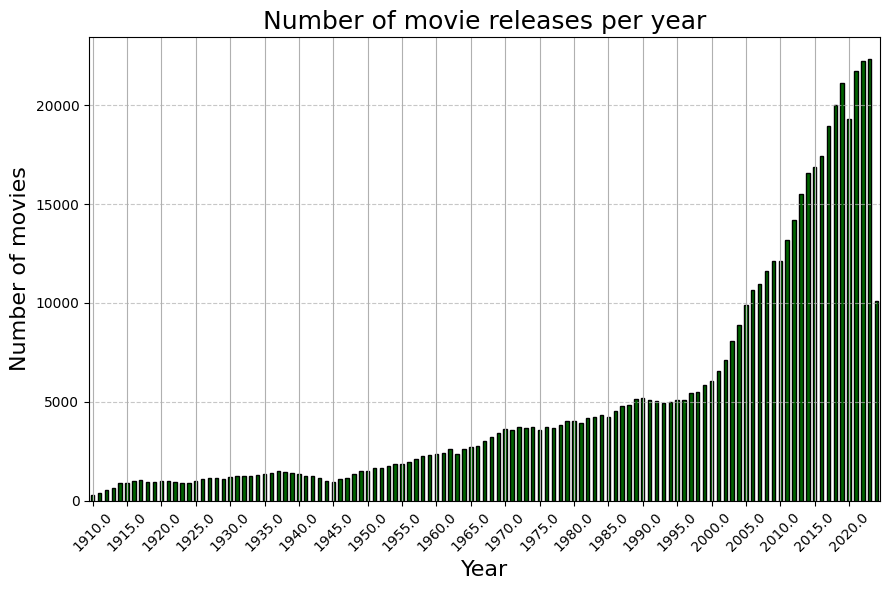

In [16]:
#number of movies throughout the years
movies_num = released_movies["year"].value_counts().sort_index()

#now we start plotting
plt.figure(figsize=(9,6))
movies_num.plot(kind="bar", color="darkgreen", edgecolor="black")
plt.title("Number of movie releases per year", fontsize=18)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of movies", fontsize=16)

xticks = np.arange(0, len(movies_num), step=5)
plt.xticks(xticks, movies_num.index[xticks], rotation=45, fontsize=10)

plt.grid(True)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

#let's see what we got
plt.show()

By separating the ticks, at least it looks cleaner than before with everything being very cramped

Yes the movies are still a lot, let's "cramp" them up by plotting the average value of the movies released every x-years

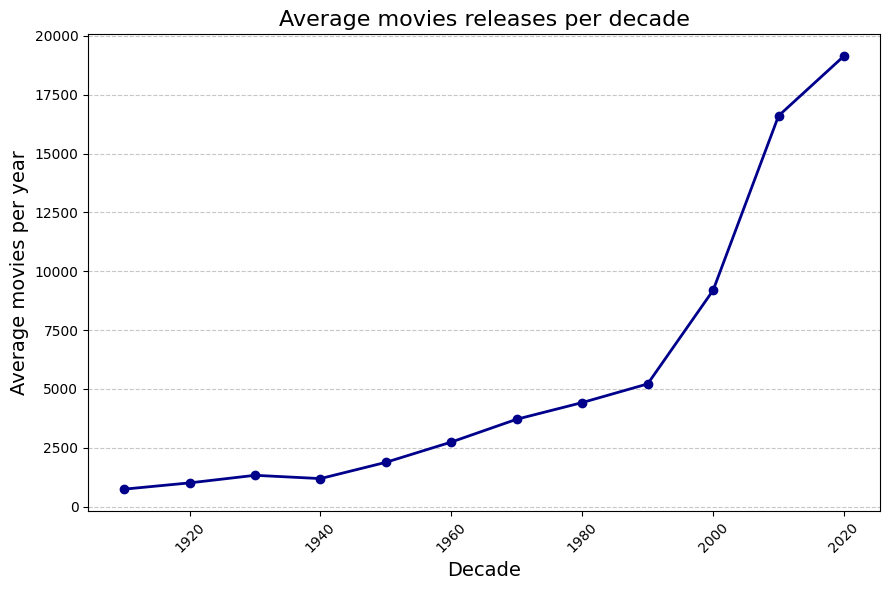

In [17]:
#representing the decades
released_movies["decade"] = (released_movies["year"] // 10) * 10 

#movies per decade
film_counts_by_decade = released_movies["decade"].value_counts().sort_index()

#years contained exactly in a certain decade
years_per_decade = released_movies.groupby("decade")["year"].nunique()

#counts adjusted for the number of years present
adjusted_counts = film_counts_by_decade/years_per_decade

#we are almost there, we need to plot another kind of graph
plt.figure(figsize=(9,6))
plt.plot(adjusted_counts.index, adjusted_counts.values, marker="o", color="darkblue", linestyle='-', linewidth=2, markersize=6)

plt.title("Average movies releases per decade", fontsize=16)
plt.xlabel("Decade", fontsize=14)
plt.ylabel("Average movies per year", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Now let's take a look at the number of actors in the decades to see if the behavior is somehow similar

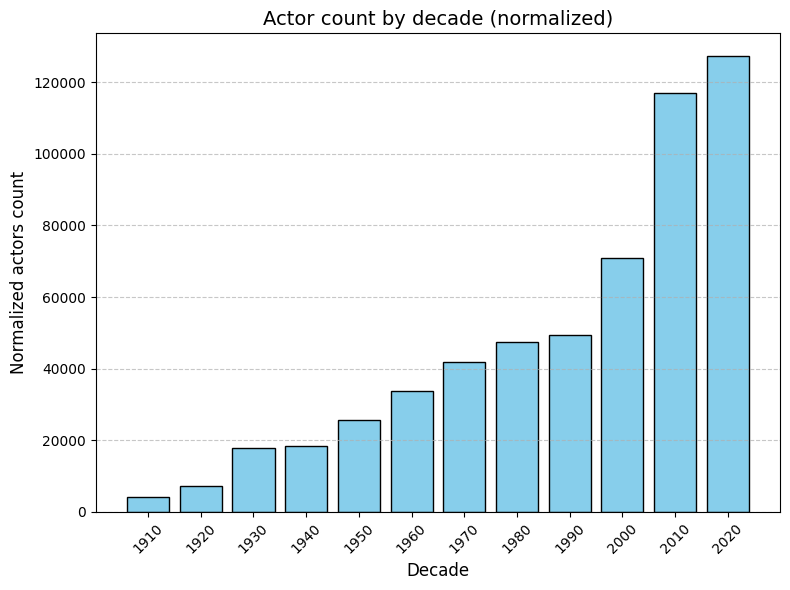

In [18]:
#it's never obvious not to get inconsistencies when merging the files we are trying to 
#combine and analyze
#so we change the "name" to "actor-name"
actors.columns = ["id", "actor_name", "role"]

#let's MERGE actors and released_movies
merged = pd.merge(actors, released_movies, on="id")

#actors per decade
actors_per_decade = merged.groupby("decade")["actor_name"].count()

#years per decade
years_per_decade = released_movies.groupby("decade")["year"].nunique()

#counts to be normalized
normalized_counts = (actors_per_decade / years_per_decade).fillna(0)

#now we plot

plt.figure(figsize=(8, 6))
plt.bar(normalized_counts.index, normalized_counts, width=8, color="skyblue", edgecolor="black")
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Normalized actors count", fontsize=12)
plt.title("Actor count by decade (normalized)", fontsize=14)
plt.xticks(normalized_counts.index, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

We still have to check if the average number of actors has increased or not..

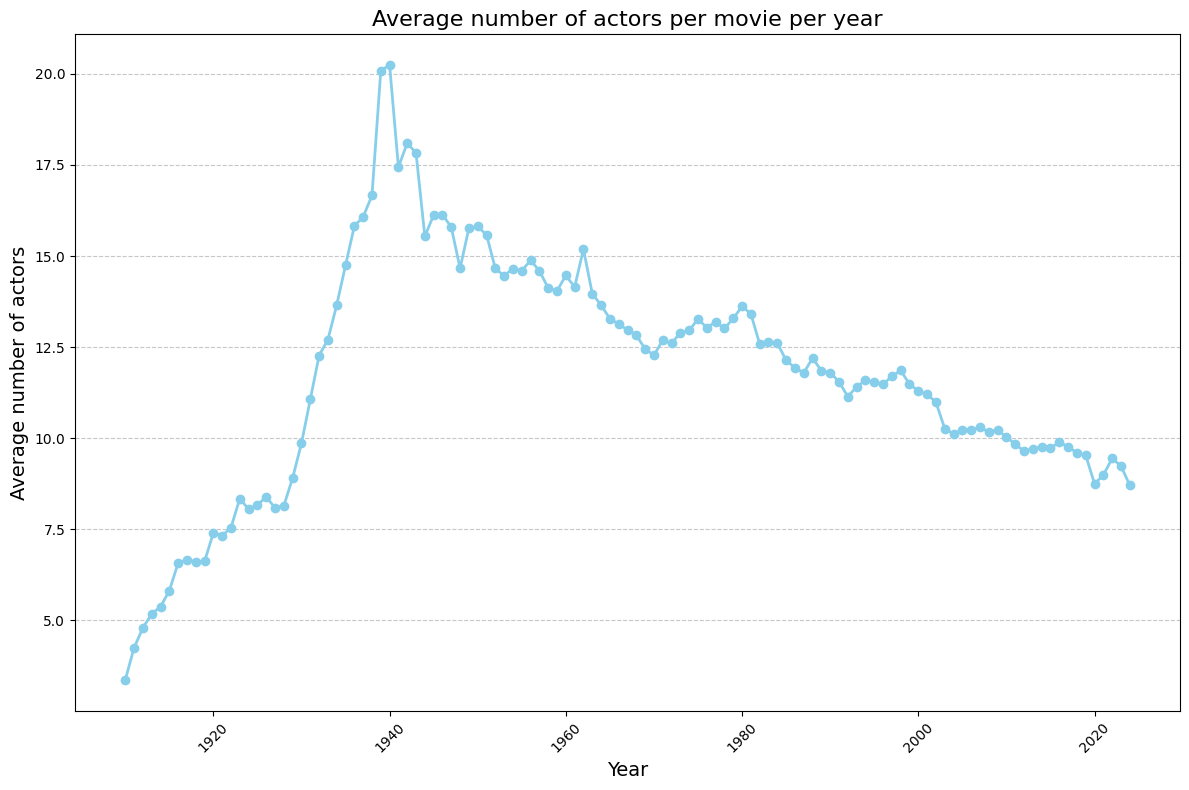

In [19]:
#So we unify released_movies and actors grouped by the id with parameter
#how="inner", only the movies with similarities in both datasets would be maintained

merged_data=released_movies.merge(actors, on="id", how="inner")

#no date movies...cleared
merged_data = merged_data.dropna(subset=["year"])

#actors count per movie
actors_per_movie = merged_data.groupby("id")["actor_name"].count()

#let's add the number of actors per movie to the released:movies dataset
released_movies["num_actors"] = released_movies["id"].map(actors_per_movie)

#let's dropna movies with no actors
released_movies_with_actors = released_movies.dropna(subset="num_actors")

#average actors epr year
average_actors_per_year = released_movies_with_actors.groupby("year")["num_actors"].mean()

#now we plot
plt.figure(figsize=(12, 8))

plt.plot(average_actors_per_year.index, average_actors_per_year.values, marker='o', color="skyblue", linestyle='-', linewidth=2, markersize=6)

plt.title("Average number of actors per movie per year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average number of actors", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


The peculiar thing is that, though the movies per year have been growing up, kind of exponentially, the number of actors has gradually been stabilizing, diminishing, but still gradually.

LET'S CHECK IF THE DURATION OF THE MOVIES HAS SOMEHOW CHANGED THROUGHOUT HISTORY

as previously, there might be some movies under or over a certain range that might make the graph more difficult to read, so we'll be using a normalized version of the dataset so as to see in a clear manner the difference in duration from the start of the 20th century up until now.

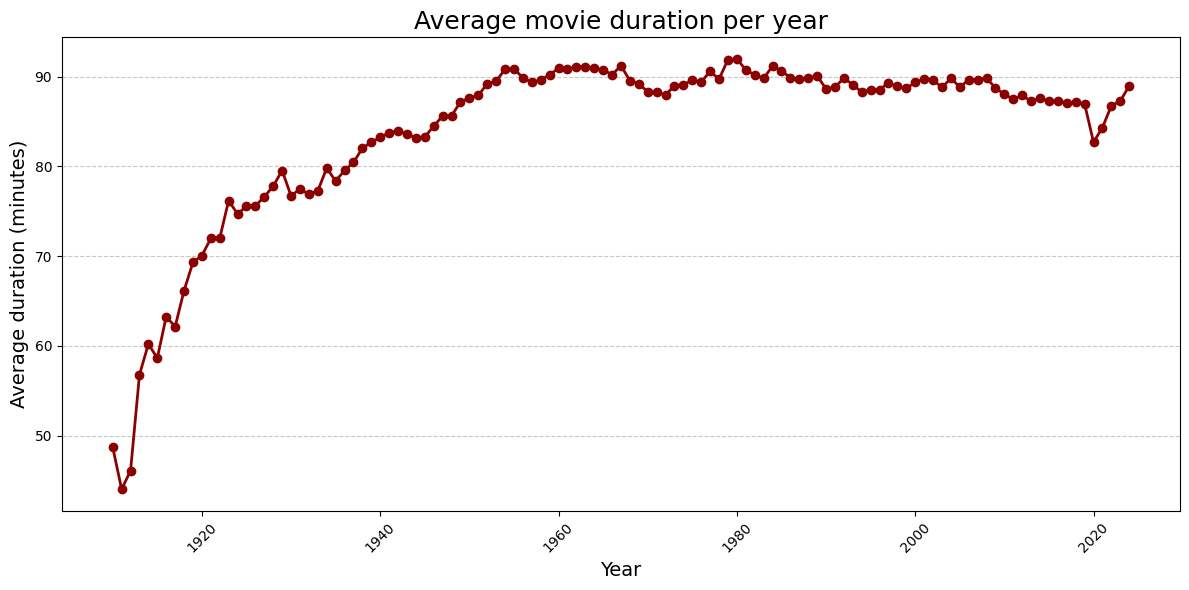

In [20]:
#minute column must not have N/A values
released_movies_cleaned= released_movies.dropna(subset=["minute"])

#average duration of the movies
avg_duration_per_year = released_movies_cleaned.groupby("year")["minute"].mean()

#let's plot this
plt.figure(figsize=(12,6))
plt.plot(average_actors_per_year.index, avg_duration_per_year.values, marker='o', color="darkred", linestyle='-', linewidth=2, markersize=6)

plt.title("Average movie duration per year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average duration (minutes)", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, axis="y", linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Now let's uncover the states that have released the most movies

we'll be using a bar graph that illustrates the countries releasing the most number of movies, let's see how it goes


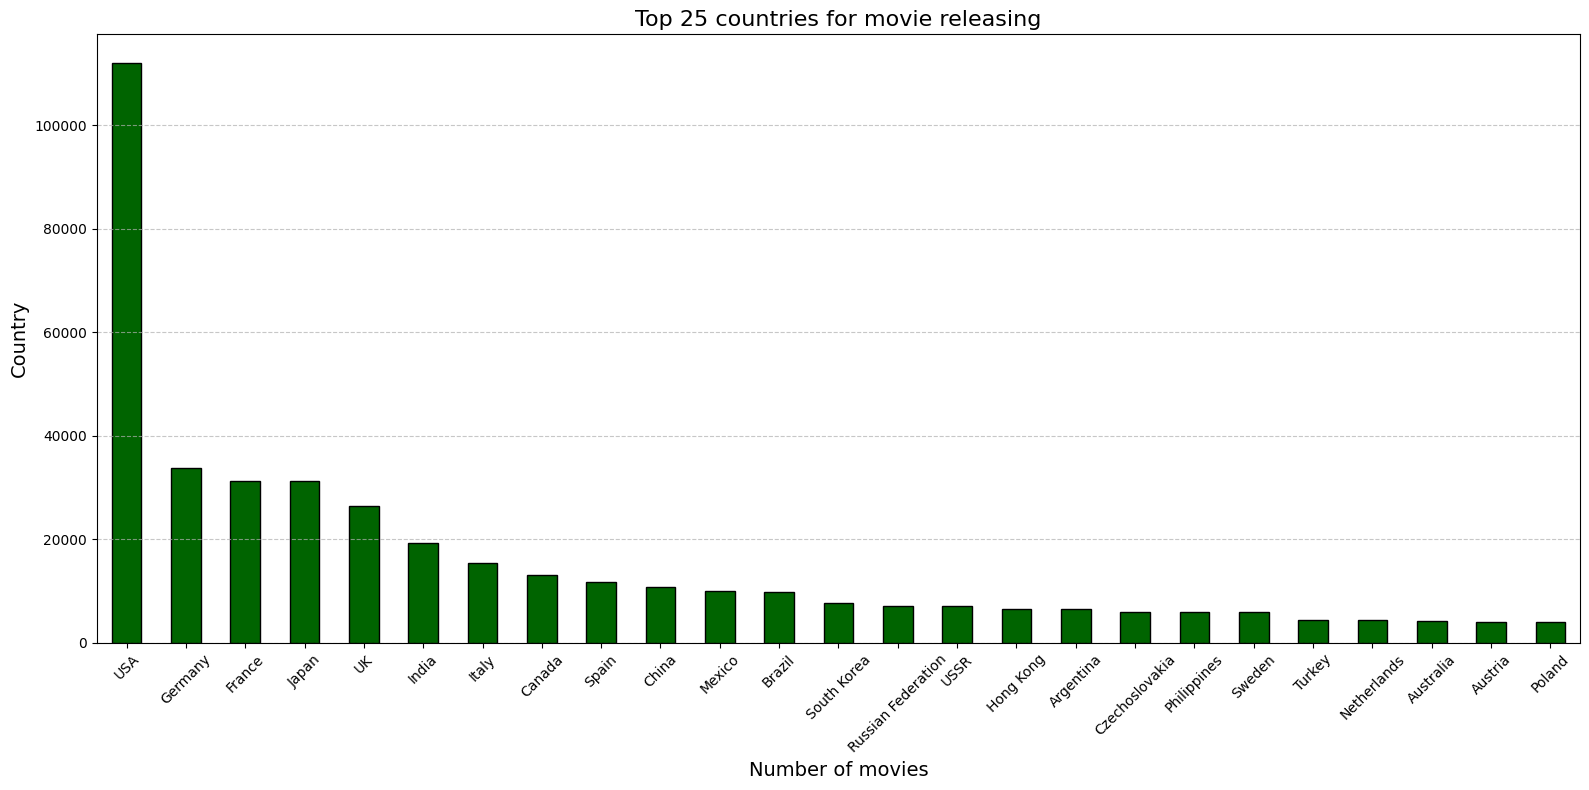

In [21]:
#we'll be merging released_movies with countries via "id"
merged_data = pd.merge(released_movies, countries, on="id")

#remove the N/A values of countries with no movies released
merged_data = merged_data.dropna(subset=["country"])

#let's count the movies for each country
movies_per_country = merged_data["country"].value_counts()

#25 top grossing countries for movies
top_25_movies_per_country = movies_per_country.head(25)

#now we plot
plt.figure(figsize=(16,8))
top_25_movies_per_country.plot(kind="bar", color="darkgreen", edgecolor="black")

plt.title("Top 25 countries for movie releasing", fontsize=16)
plt.xlabel("Number of movies", fontsize=14)
plt.xticks(rotation=45,fontsize=10)
plt.ylabel("Country", fontsize=14)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Let's see in geographical terms the distribution of the countries with most movies

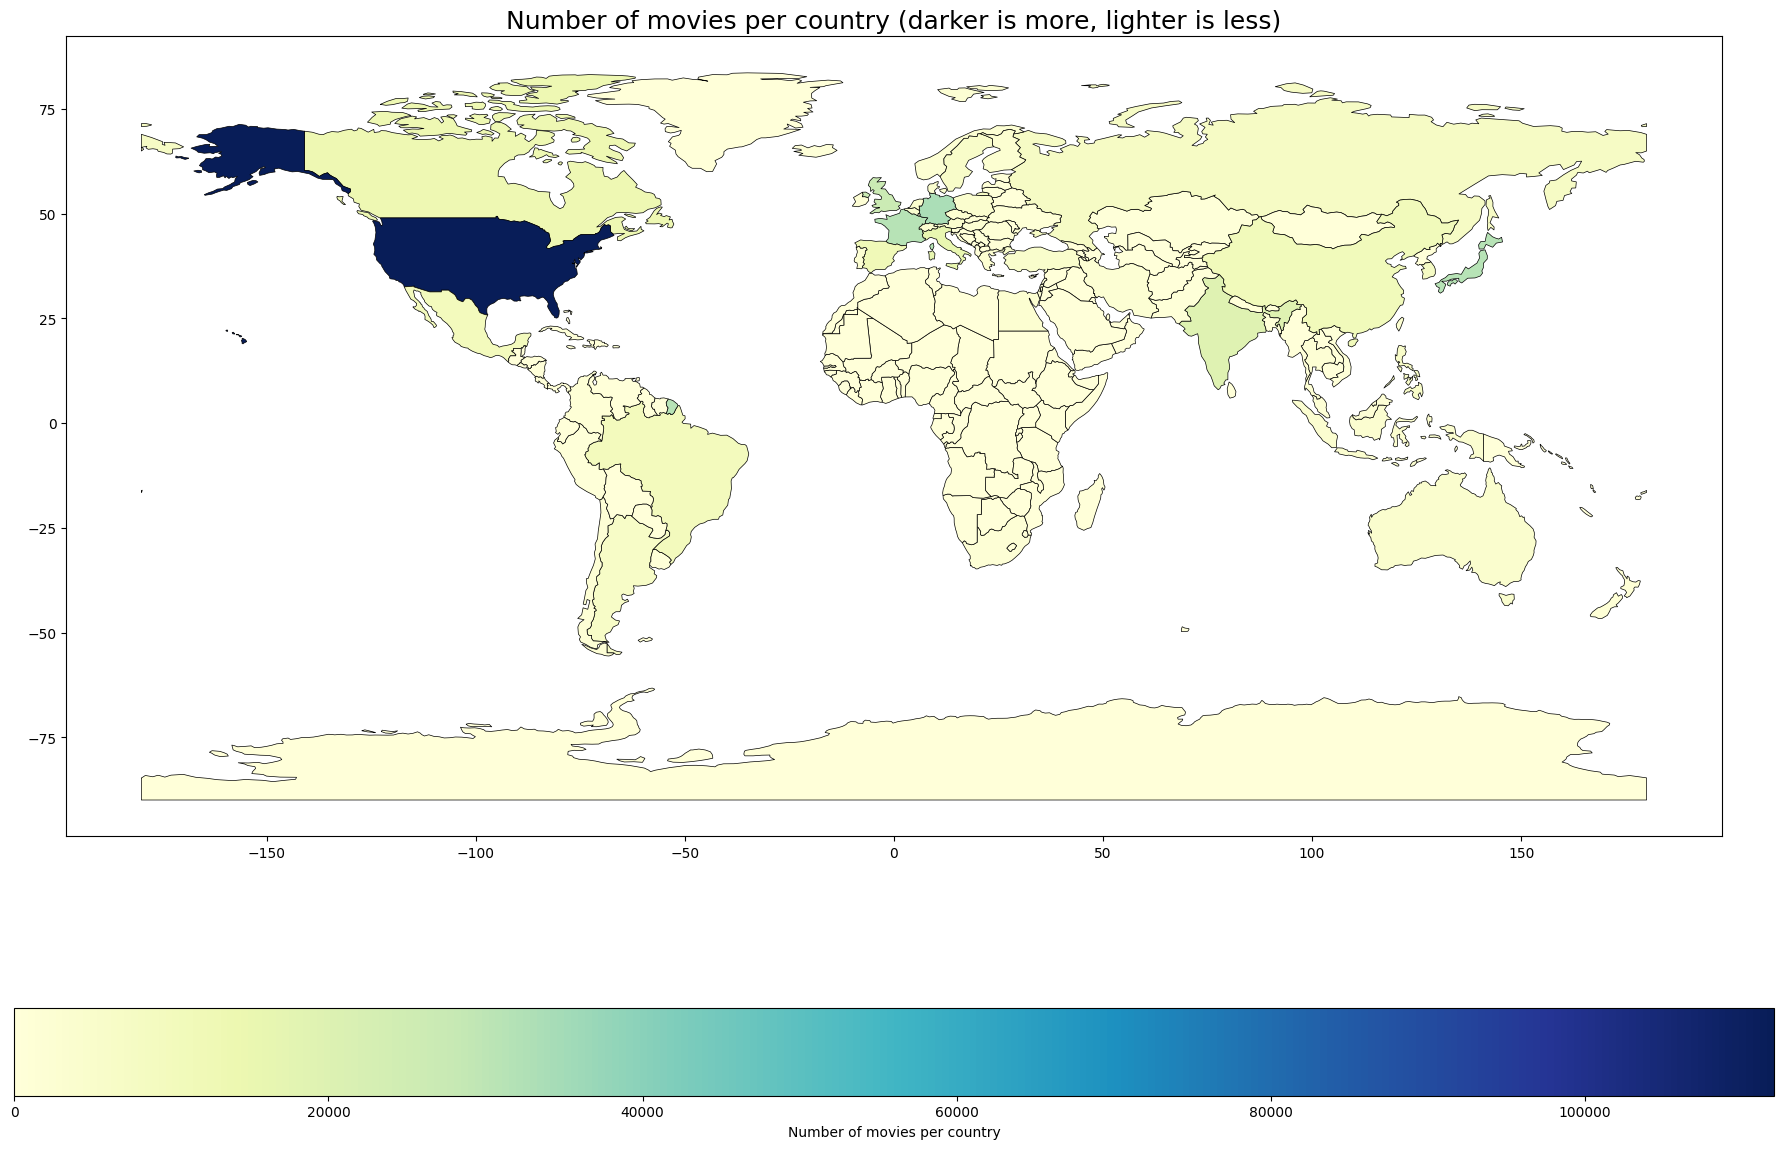

In [22]:
#let's load the data from the file_path
world_map = gpd.read_file(file_path)

#the map has certain names for countries, the dataset other, so we substitute them
merged_data["country"] = merged_data["country"].replace({
    "USSR": "Russia",
    "USA": "United States of America",
    "UK": "United Kingdom"
})

#let's count the movies per country

country_film_count = merged_data["country"].value_counts()
country_film_count = country_film_count.reset_index()
country_film_count.columns = ["country","film_count"]

#unifiying of the geo data with thos from the movies
merged_map = world_map.set_index('NAME').join(country_film_count.set_index('country'))

#NaN values we replace them with 0
merged_map["film_count"] = merged_map["film_count"].fillna(0)

#time to plot
fig, ax = plt.subplots(1,1, figsize=(18,12))

merged_map.plot(column="film_count", ax=ax, legend=True,
                legend_kwds={'label': "Number of movies per country",
                             'orientation': "horizontal"},
                cmap="YlGnBu", edgecolor="black", linewidth=0.5
                )

ax.set_title("Number of movies per country (darker is more, lighter is less)", fontsize=18)
plt.tight_layout()
plt.show()

Problem is...USA looks like the only country to be producing movies, let's put a max threshold and see who can be a close second.

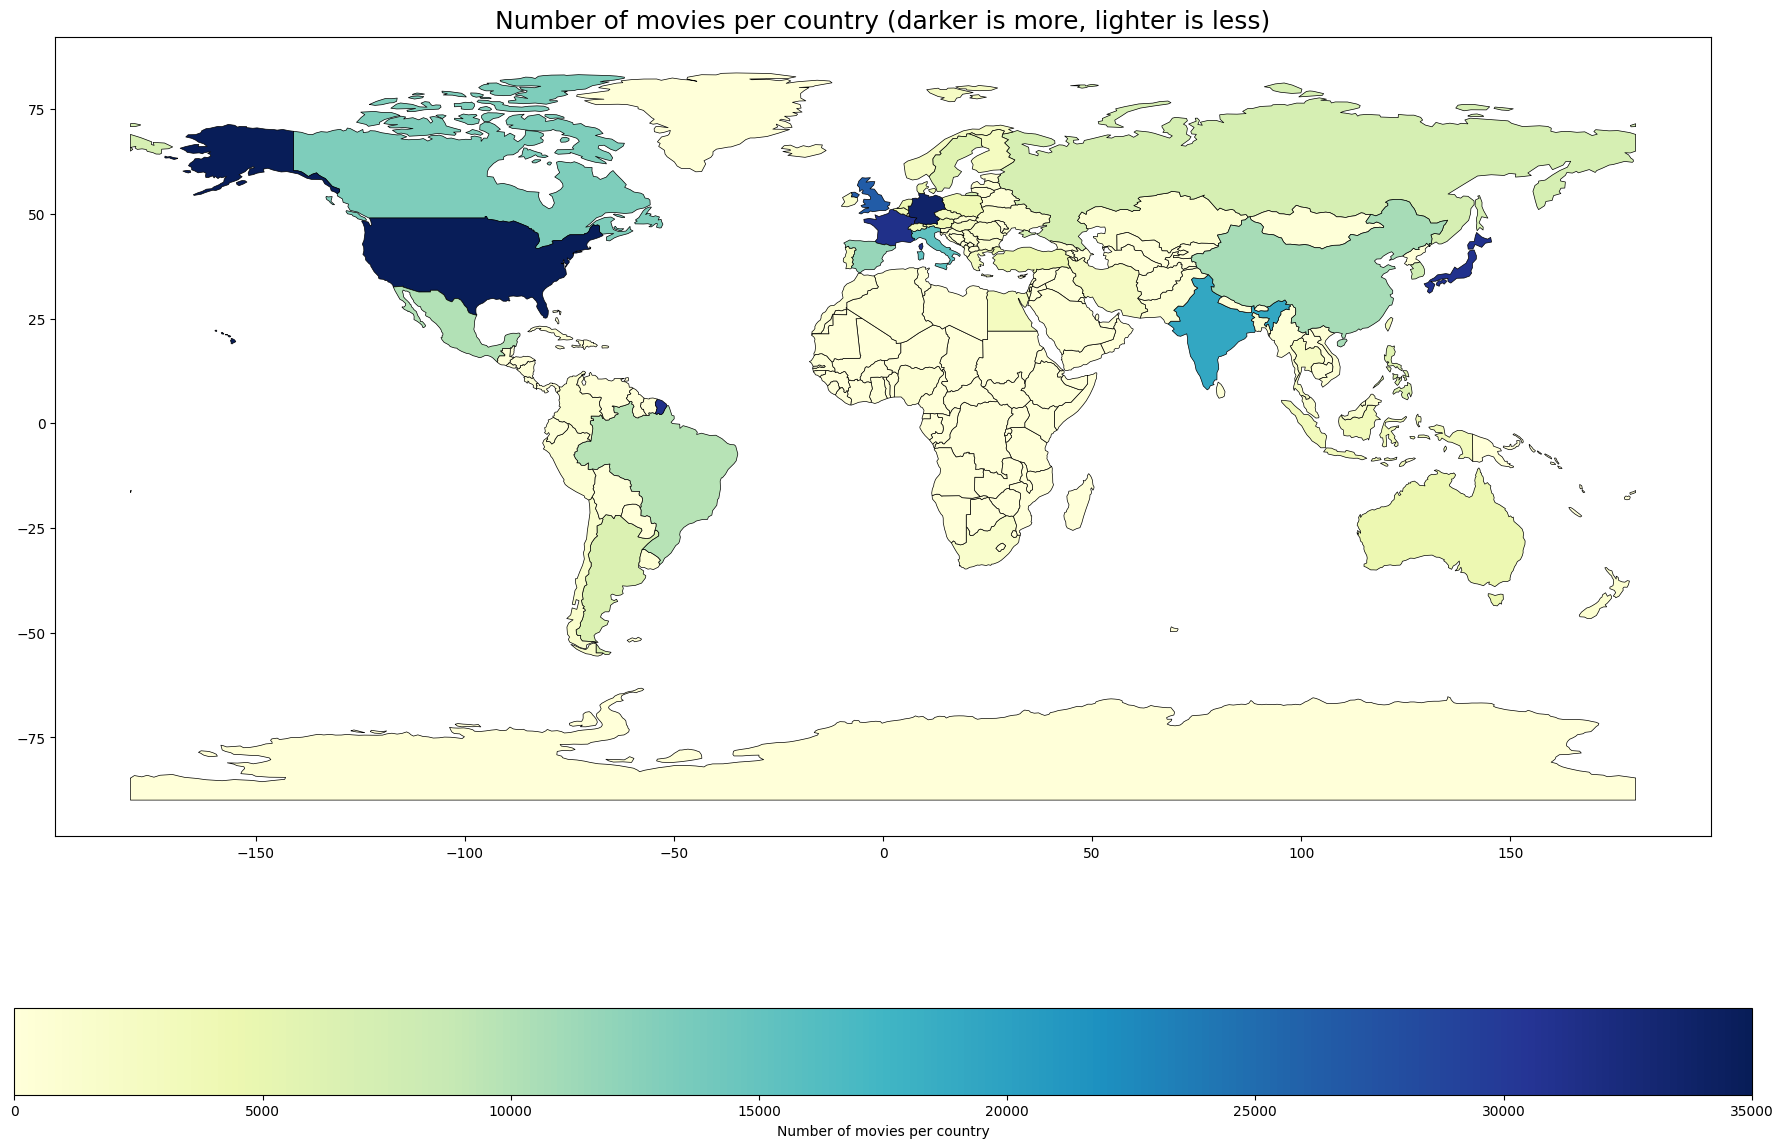

In [23]:
#max threshold
max_film_count = 35000

#let's plot again
#time to plot
fig, ax = plt.subplots(1,1, figsize=(18,12))

merged_map.plot(column="film_count", ax=ax, legend=True,
                legend_kwds={'label': "Number of movies per country",
                             'orientation': "horizontal"},
                cmap="YlGnBu", edgecolor="black", linewidth=0.5, vmax=max_film_count
                )

ax.set_title("Number of movies per country (darker is more, lighter is less)", fontsize=18)
plt.tight_layout()
plt.show()



Now it looks a bit more competitive, the USA, Germany and Japan are closer together

FURTHER STEPS

we need a specific dataset to analyze whether the releases of the movies have been Theatricals or Digital format. Let's go

In [24]:
#after 2000 movie releases
filtered_releases = releases[(releases["date"] >= "2000") & (releases["date"] <= "2025") & (releases["type"]!= "Premiere")]

# let's sort them by Id and Date
sorted_releases = filtered_releases.sort_values(by=["id", "date"])

#drop duplicates
unique_releases = sorted_releases.drop_duplicates(subset="id", keep="first")

#check necessary columns
released_movies_type = unique_releases.merge(
    movies[["id", "name"]], on="id", how="inner"
)[["id", "name", "date", "type"]]


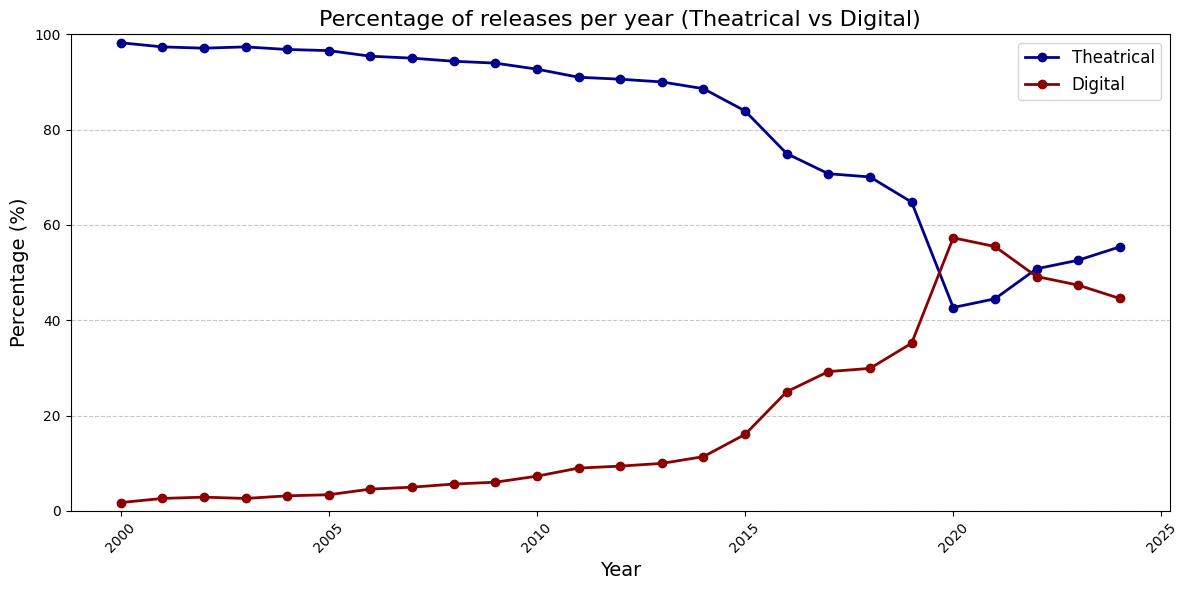

In [25]:
#the Date column must be formatted as datetime
released_movies_type["date"] = pd.to_datetime(released_movies_type["date"])

#new column containing the "year" value
released_movies_type["year"] = released_movies_type["date"].dt.year

#filter with Premiere or Theatrical
premiere_theatrical = released_movies_type[
    released_movies_type["type"].isin(["Theatrical"])
]

#type Digital filter
digital = released_movies_type[released_movies_type["type"] == "Digital"]

#number of releases
premiere_theatrical_per_year = (
    premiere_theatrical.groupby("year")["id"].count()
)
digital_per_year = digital.groupby("year")["id"].count()

#total releases per year (Premiere, Theatrical, Physical)
total_releases_per_year = (
    premiere_theatrical_per_year + digital_per_year
)

#percentages per group
premiere_theatrical_percentage = (
    (premiere_theatrical_per_year / total_releases_per_year) * 100
).fillna(100)
digital_percentage = (
    (digital_per_year / total_releases_per_year) * 100
).fillna(0)

#let's plot
plt.figure(figsize=(12, 6))

plt.plot(
    premiere_theatrical_percentage.index,
    premiere_theatrical_percentage.values,
    marker='o',
    color="darkblue",
    linestyle='-',  
    linewidth=2,
    markersize=6,
    label="Theatrical"
)


plt.plot(
    digital_percentage.index,
    digital_percentage.values,
    marker='o',
    color="darkred",
    linestyle='-',  
    linewidth=2,
    markersize=6,
    label="Digital"
)

plt.title("Percentage of releases per year (Theatrical vs Digital)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=14)
plt.ylim(0, 100)  # sets the axis between 0 and 100
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

BUT:

We want to see as well the top grossing genre.


We will be drawing two pie charts for the top grossing genres

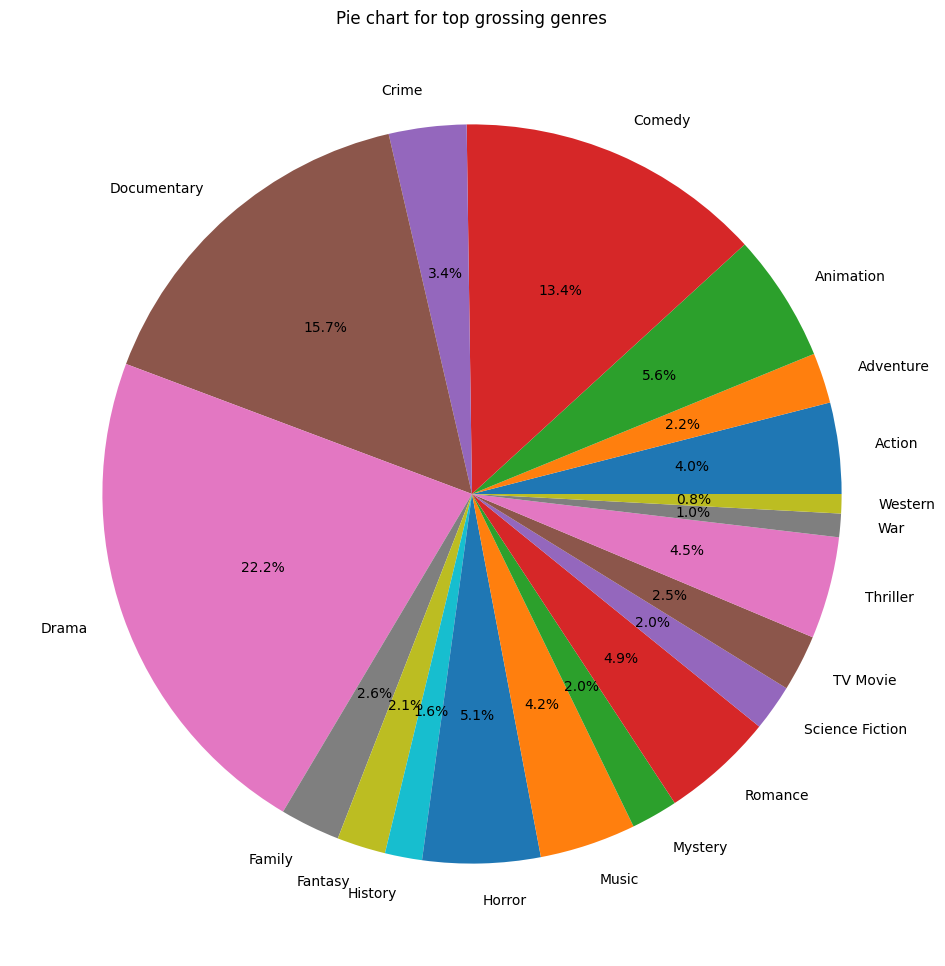

In [26]:
#drop duplicates
genres.drop_duplicates(subset=["id", "genre"])

#we group by "genre" and count the number of elements
genre_counts = genres.groupby("genre").size()

#let's plot
genre_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(12,12))
plt.title('Pie chart for top grossing genres')
plt.ylabel('')
plt.show()

OK, Now we can analyze another dataset, let's see how the Themes "behave".

We'll create a Bar-plot to see the top 10/top 20 themes of all time, and which has gotten more "fashionable" throughout history

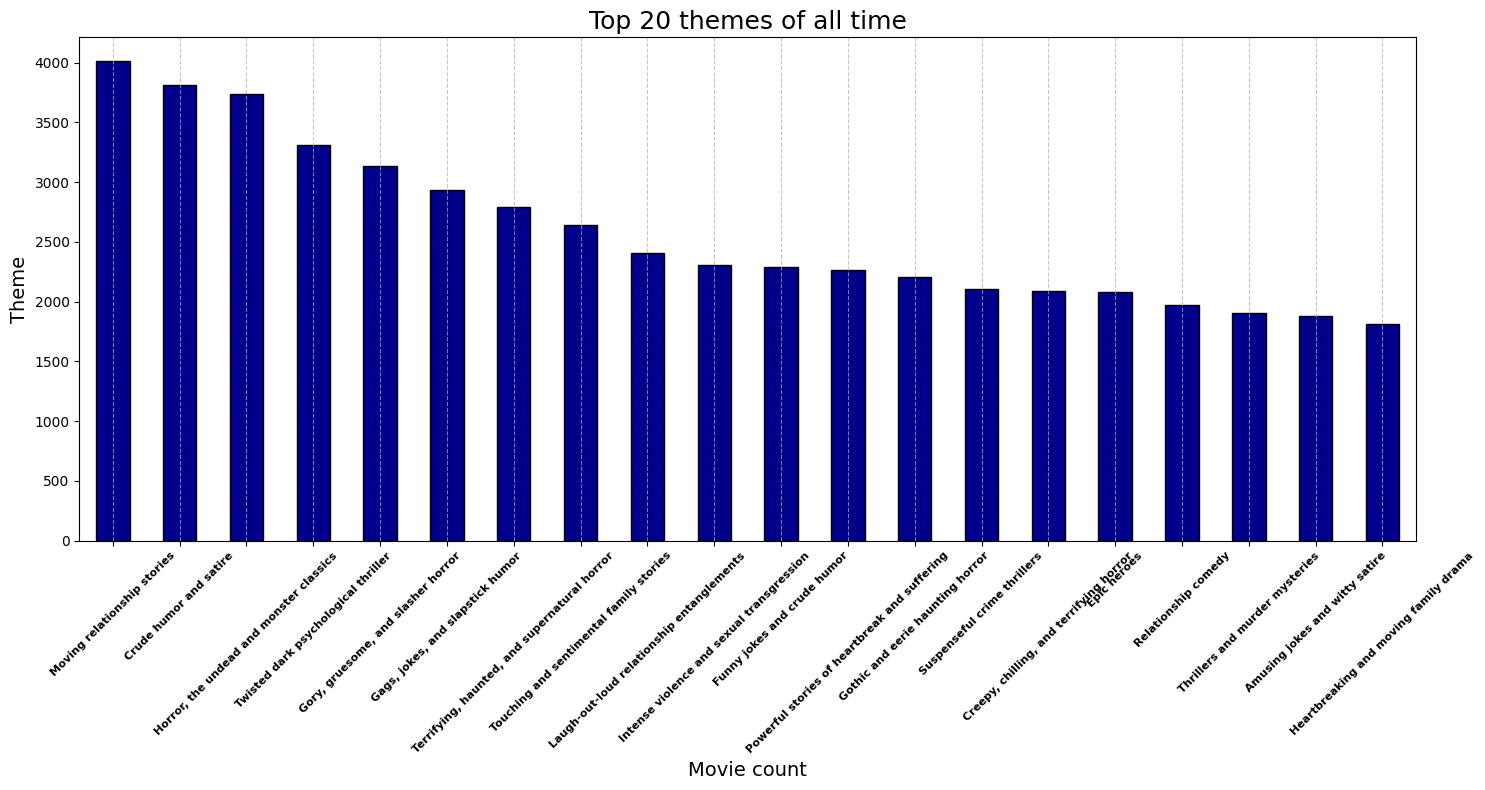

In [27]:
#let's count the most frequent themes first
top_themes = themes["theme"].value_counts().head(20)

#Plot
plt.figure(figsize=(15,8))
top_themes.plot(kind="bar", color="darkblue", edgecolor="black")
plt.title("Top 20 themes of all time", fontsize=18)
plt.xlabel("Movie count", fontsize=14)
plt.ylabel("Theme", fontsize=14)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.xticks(rotation=45, fontsize=8, fontweight="bold")
plt.tight_layout()
plt.show()



Looks like people love both romantic movies but are very intrigued by horror stories and gruesome murders...well the data shows this.

AT THIS POINT, we can look at the distribution of the themes over time, and see what has been growing throughout history.

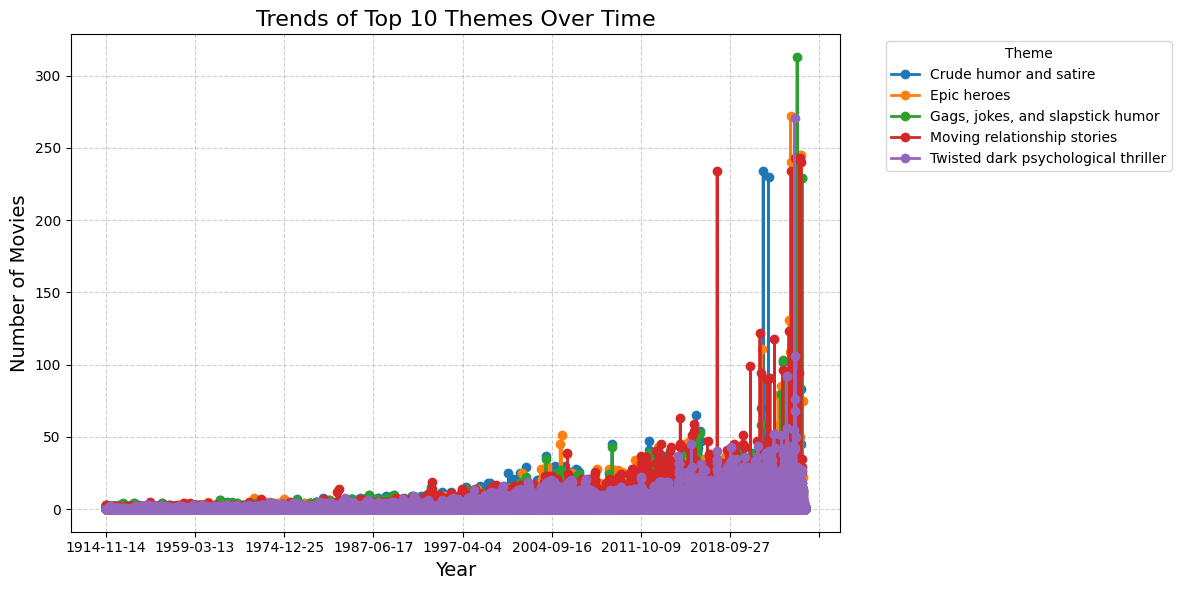

In [28]:
#We shall merge themes with releases
themes_with_years = themes.merge(releases[["id", "date"]], on="id")

#choose top x-themes (x as in themes count)...as in head(x) themes
top_themes = themes_with_years["theme"].value_counts().head(5).index

#filter only top themes
filtered_themes = themes_with_years[themes_with_years["theme"].isin(top_themes)]

#we group by year
theme_year_counts = filtered_themes.groupby(["date", "theme"]).size().unstack(fill_value=0)

#we plot
theme_year_counts.plot(kind="line", figsize=(12, 6), linewidth=2, marker='o')
plt.title("Trends of Top 10 Themes Over Time", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Movies", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Theme", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

As we can see the number of "Moving relationship stories is the mst popular" as it had a rapid growth in the last 20 to 25 years, as well as the Twisted dark psycho thrillers have been very consistent with arounf 100 movies produced every year in the last 20-30 years. Epic heroes are starting to become more and more famous, Gags and jokes are still not breaking that much into the market. All of this might be due to political policies, public morale, or maybe just the data might say so

TO DO: COUNTRIES WITH THEMES

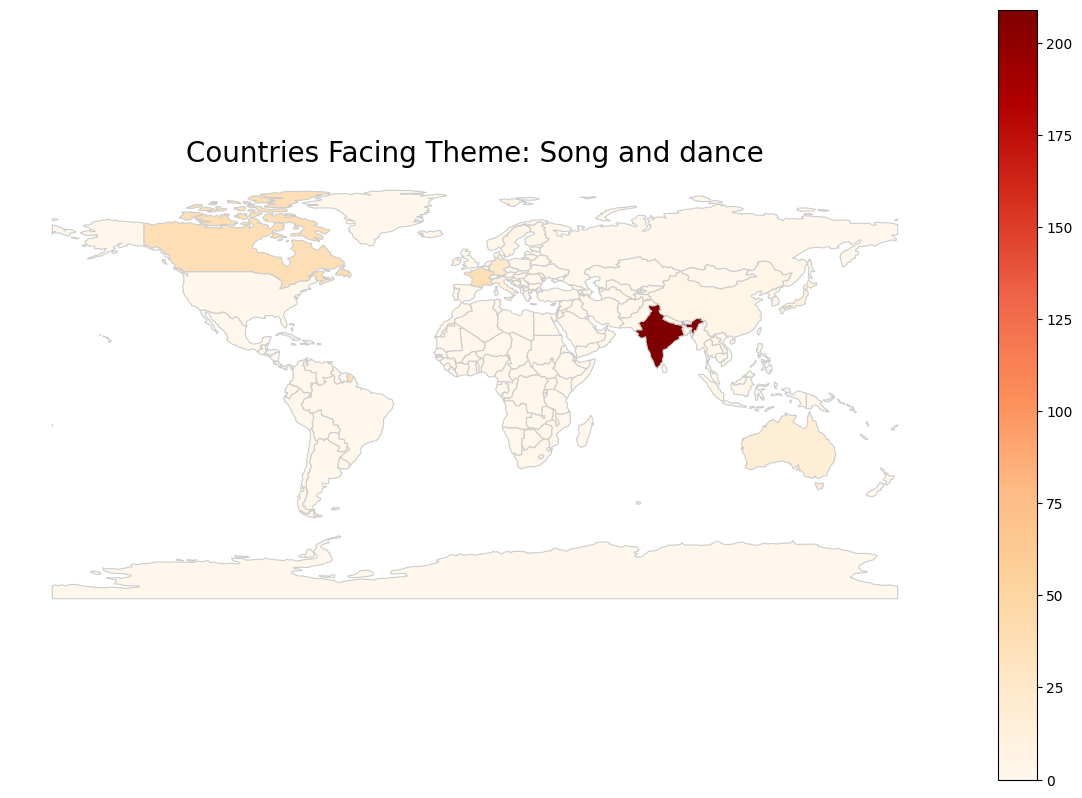

In [29]:
# Load shapefile of countries
world_map = gpd.read_file(file_path)  # e.g. 'ne_110_m_admin_countries.shp'

# Load datasets
themes = pd.read_csv("../dataset/themes.csv")    # columns: id, theme
countries = pd.read_csv("../dataset/countries.csv")  # columns: id, country

# Choose the theme you want to analyze
theme_of_interest = "Song and dance"

# Filter themes for the theme of interest
themes_filtered = themes[themes['theme'] == theme_of_interest]

# Join themes_filtered with countries on 'id' to get countries of movies with that theme
movies_countries_with_theme = pd.merge(themes_filtered[['id']], countries, on='id', how='left')

# Count how many movies with that theme per country
country_counts = movies_countries_with_theme['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Check what your shapefile uses for country names or codes; common is 'NAME' or 'ADMIN'
# For example, if shapefile uses 'NAME' for country names:
world_map['NAME'] = world_map['NAME'].astype(str)

# Merge the country counts into the GeoDataFrame by matching country names
world_map = world_map.merge(country_counts, left_on='NAME', right_on='country', how='left')

# Fill NaNs (countries with no movies with that theme) with 0
world_map['count'] = world_map['count'].fillna(0)

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_map.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title(f'Countries Facing Theme: {theme_of_interest}', fontsize=20)
ax.axis('off')
plt.show()

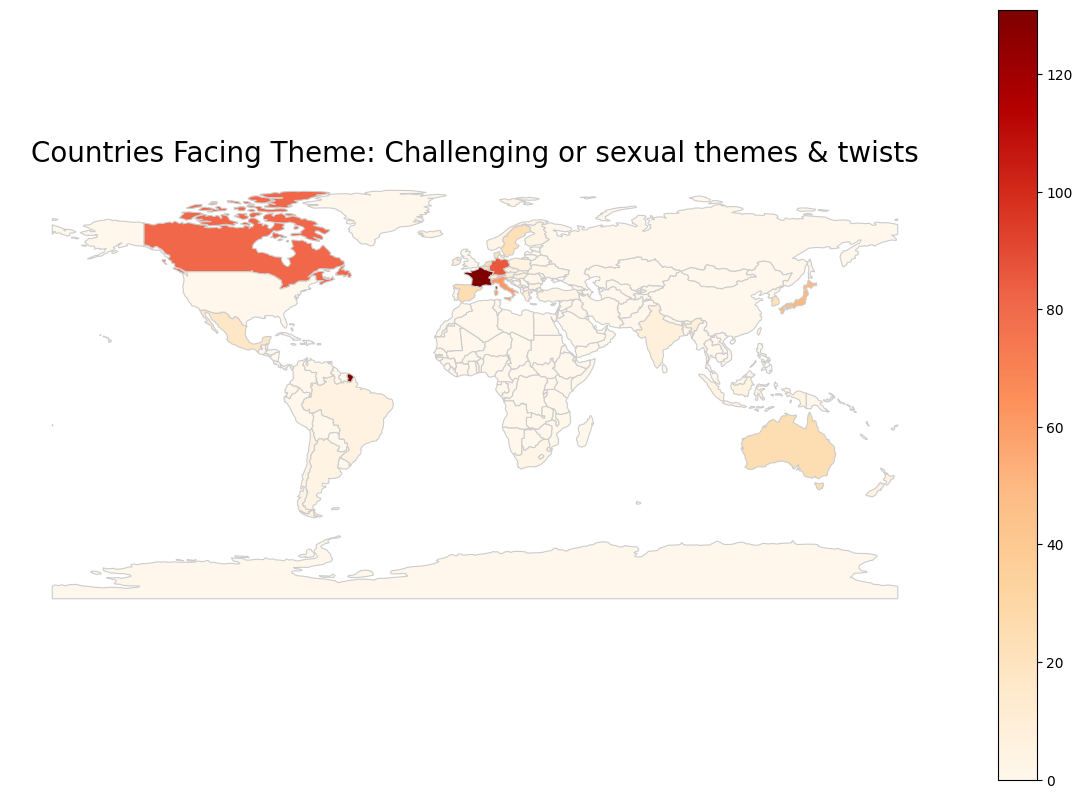

In [30]:
# Load shapefile of countries
world_map = gpd.read_file(file_path)  # e.g. 'ne_110_m_admin_countries.shp'

# Load datasets
themes = pd.read_csv("../dataset/themes.csv")    # columns: id, theme
countries = pd.read_csv("../dataset/countries.csv")  # columns: id, country

# Choose the theme you want to analyze
theme_of_interest = "Challenging or sexual themes & twists"

# Filter themes for the theme of interest
themes_filtered = themes[themes['theme'] == theme_of_interest]

# Join themes_filtered with countries on 'id' to get countries of movies with that theme
movies_countries_with_theme = pd.merge(themes_filtered[['id']], countries, on='id', how='left')

# Count how many movies with that theme per country
country_counts = movies_countries_with_theme['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Check what your shapefile uses for country names or codes; common is 'NAME' or 'ADMIN'
# For example, if shapefile uses 'NAME' for country names:
world_map['NAME'] = world_map['NAME'].astype(str)

# Merge the country counts into the GeoDataFrame by matching country names
world_map = world_map.merge(country_counts, left_on='NAME', right_on='country', how='left')

# Fill NaNs (countries with no movies with that theme) with 0
world_map['count'] = world_map['count'].fillna(0)

# Plot choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_map.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title(f'Countries Facing Theme: {theme_of_interest}', fontsize=20)
ax.axis('off')
plt.show()

OK, IT SEEMS PRETTY CLEAR.

Bollywood does prefer looking for dance and songs, whilst countries like France, Germany and Canada prefer something deeper and challenging. This relation between themes and countries shows what the films industry is looking for in their countries.

Now let's analyze how the posters instead have been behaving over time

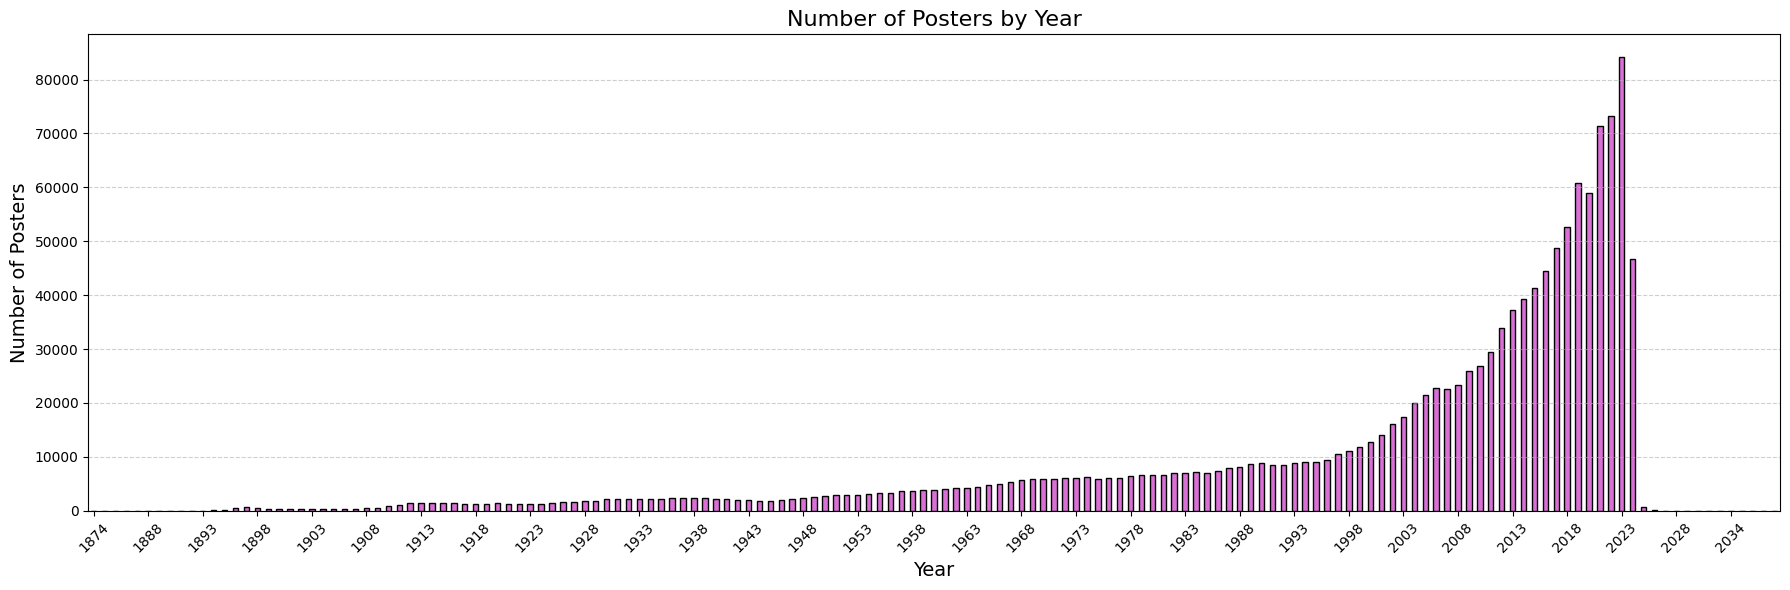

In [31]:
#Merging it all with release years
posters_with_year = posters.merge(releases[["id", "date"]], on="id")

# Extract the year from the 'date' column
posters_with_year['year'] = pd.to_datetime(posters_with_year['date']).dt.year

# Count posters by year
poster_year_counts = posters_with_year['year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(18,6))
poster_year_counts.plot(kind='bar', color='orchid', edgecolor='black')
plt.title("Number of Posters by Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Posters", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)

ticks_to_use = np.arange(0, len(poster_year_counts), 5)
plt.xticks(ticks_to_use, poster_year_counts.index[ticks_to_use], rotation=45, fontsize=10)


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Well, just as we expected, posters have increased in number throughout history...but let's see which have been more consistent.

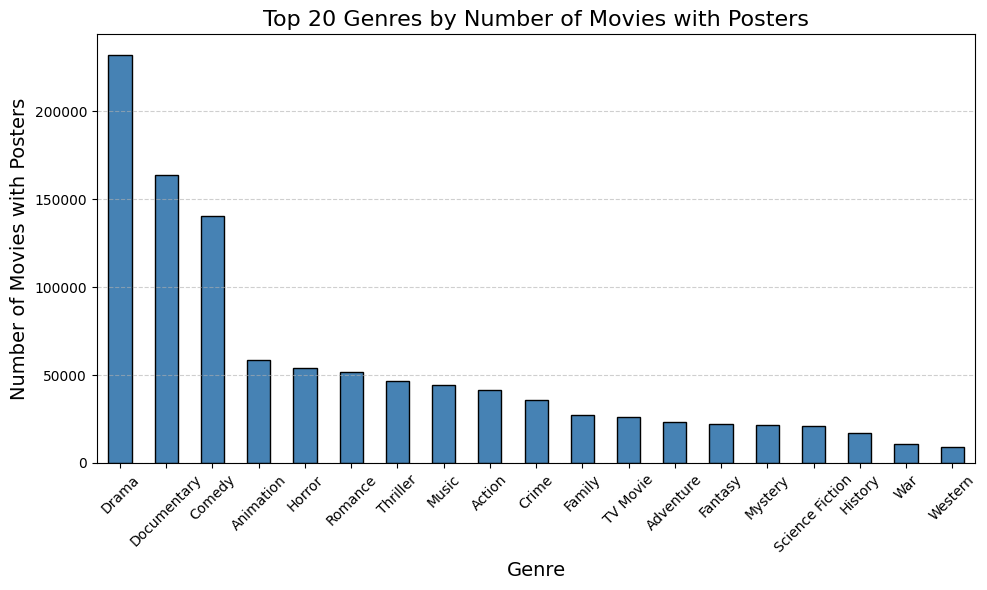

In [32]:
#We can merge the posters and genres datasets and link them 
#via id, so to see which posters have had a bigger impact

# Mark movies with posters
posters['has_poster'] = True

# Merge genres with posters on 'id' to keep only movies that have posters
merged = genres.merge(posters[['id', 'has_poster']], on='id', how='inner')

# Count how many movies with posters per genre
count_per_genre = merged.groupby('genre')['id'].nunique().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10,6))
count_per_genre.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 20 Genres by Number of Movies with Posters', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies with Posters', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

SPEAKING OF THEMES

Let's continue the analysis on the Themes, and see the number of times that theme appears in that country’s movies.



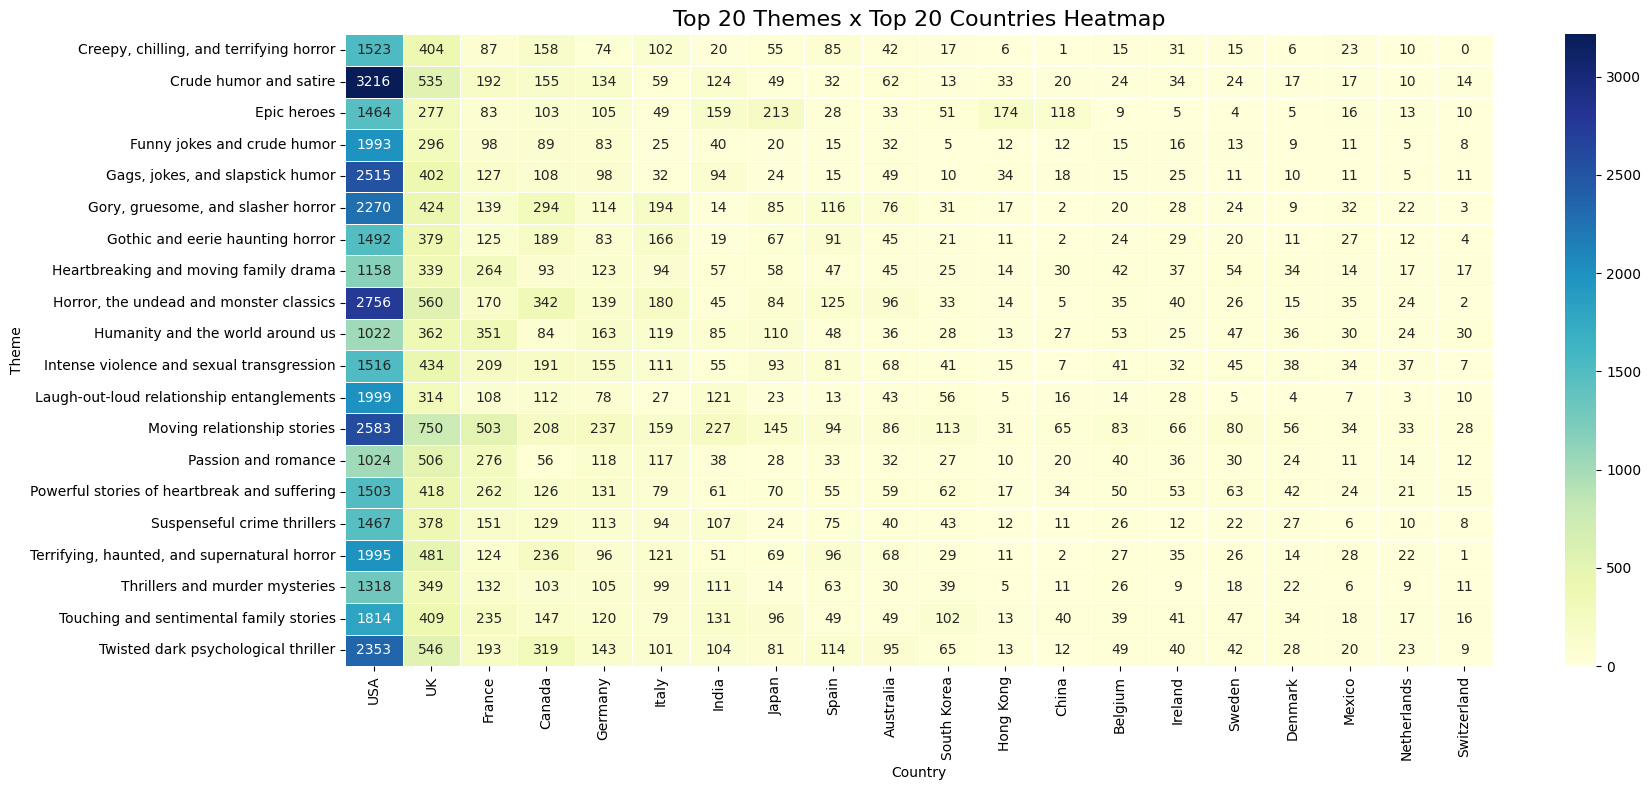

In [33]:
#First we merge themes and countries to get theme-country pairs
theme_country = pd.merge(themes, countries, on='id')

#count theme-country occurrences
heatmap_data = theme_country.groupby(['theme', 'country']).size().reset_index(name='count')

#Pivot for the heatmap
heatmap_pivot = heatmap_data.pivot(index='theme', columns='country', values='count').fillna(0)

#Let's check the top 20 themes and countries
top_themes = heatmap_data.groupby('theme')['count'].sum().nlargest(20).index
top_countries = heatmap_data.groupby('country')['count'].sum().nlargest(20).index
filtered_heatmap = heatmap_pivot.loc[heatmap_pivot.index.isin(top_themes), top_countries]

#Let's plot it
plt.figure(figsize=(18, 8))
sns.heatmap(filtered_heatmap, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Top 20 Themes x Top 20 Countries Heatmap", fontsize=16)
plt.ylabel("Theme")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

Now we'll focus on the oscar awards and the reviews

Let's analize the distribution of the genres per movie (oscar awards)

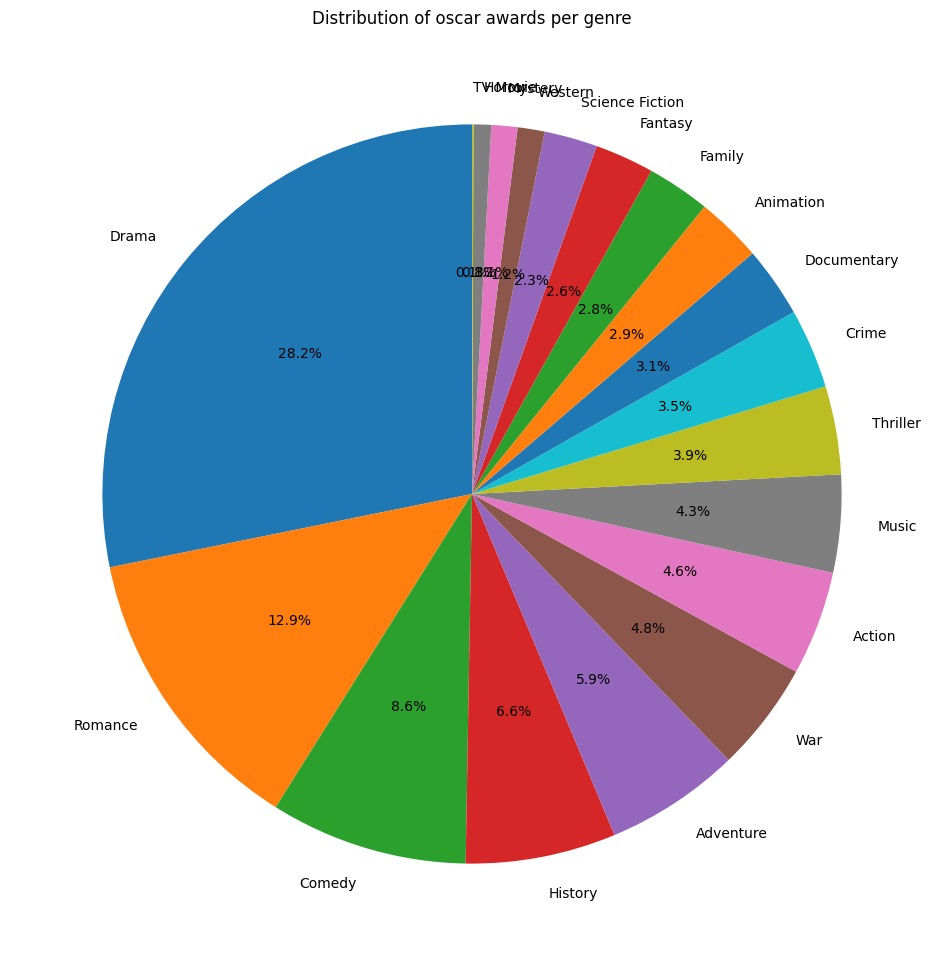

In [36]:
#adding genre to the movies
df_movies_with_genres = pd.merge(movies, genres, left_on='id', right_on='id', how='inner')

#filtering movies with oscar award
df_oscar_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

#merge winning movies with genre
df_winning_movies = pd.merge(
    df_oscar_winners,
    df_movies_with_genres,
    left_on=['film', 'year_film'],
    right_on=['name', 'date'],
    how='inner'
)

#counting oscars per genre
oscar_counts = df_winning_movies['genre'].value_counts()

#plot
plt.figure(figsize=(12, 12))
oscar_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Distribution of oscar awards per genre')
plt.ylabel('')
plt.show()

Ok as we can see, Drama and Romance dominate the competition, although on the other Pie-Chart, Docs and Coms were closely behind...how did that happen?  WELL, LET'S CHECK IT OUT

/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/2519368059.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  genre_counts_norm.loc[decade] = genre_counts_norm.loc[decade].astype(float) / decade_years[decade]
/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/2519368059.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  genre_counts_norm.loc[decade] = genre_counts_norm.loc[decade].astype(float) / decade_years[decade]
/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/2519368059.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version

<Figure size 1200x1000 with 0 Axes>

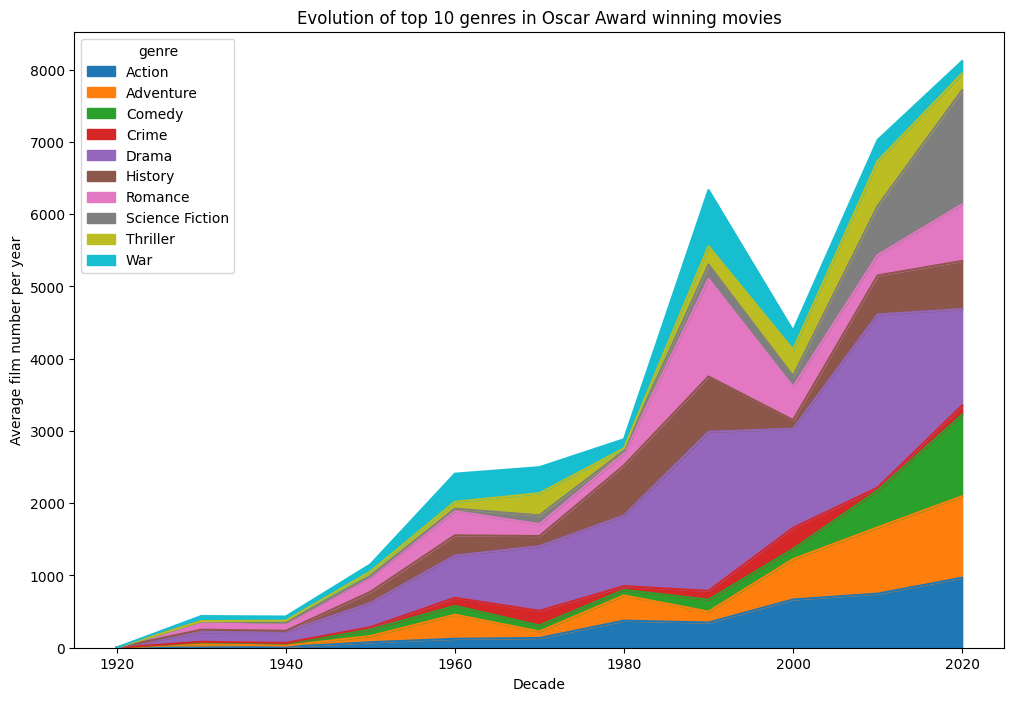

In [38]:
#filter movies that had won an oscar
df_oscar_winners = the_oscar_awards[the_oscar_awards['winner'] == True]


#merge awarded movies with movies dataset
df_winning_movies = pd.merge(
    df_oscar_winners,
    movies,
    left_on=['film', 'year_film'],
    right_on=['name', 'date'],
    how='inner'
)

#merge movies with genres
df_winning_movies_genre = pd.merge(df_winning_movies, genres, left_on='id', right_on='id', how='inner')

#merge movies with languages
df_winning_movies_languages = pd.merge(df_winning_movies_genre, languages, left_on='id', right_on='id', how='inner')

#merge movies with releases
df_winning_movies_releases = pd.merge(df_winning_movies_languages, releases, left_on='id', right_on='id', how='inner')

#group by decade
df_winning_movies_releases['decade'] = (df_winning_movies_releases['year_film'] // 10) * 10

decade_years ={
    1920: 10, 1930: 10, 1940: 10, 1950: 10, 1960: 10, 
    1970: 10, 1980: 10, 1990: 10, 2000: 10, 2010: 10, 
    2020: 5 
}

#let's explore the genres throughout the years
top_10_genres = df_winning_movies_releases['genre'].value_counts().head(10)
df_winning_movies_genre_top_10 = df_winning_movies_releases[df_winning_movies_releases['genre'].isin(top_10_genres.index)]

#group by decades and genres
genre_counts_decade_by_10 = df_winning_movies_genre_top_10.groupby(['decade', 'genre']).size().unstack(fill_value=0)

#normalizing counts for years in the decade
genre_counts_norm = genre_counts_decade_by_10.copy()
for decade in genre_counts_norm.index:
    genre_counts_norm.loc[decade] = genre_counts_norm.loc[decade].astype(float) / decade_years[decade]

#plotting
plt.figure(figsize=(12, 10))
genre_counts_norm.plot(
    kind='area',
    stacked=True,
    figsize=(12,8),
    title = "Evolution of top 10 genres in Oscar Award winning movies"
)
plt.xlabel('Decade')
plt.ylabel('Average film number per year')
plt.show()

What about the most popular languages in oscar winning movies

/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/1128854870.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  language_counts_norm.loc[decade] /= decade_years[decade]
/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/1128854870.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  language_counts_norm.loc[decade] /= decade_years[decade]
/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/1128854870.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6' has dtype incompatible with int64, please explicitly cast to

<Figure size 1200x800 with 0 Axes>

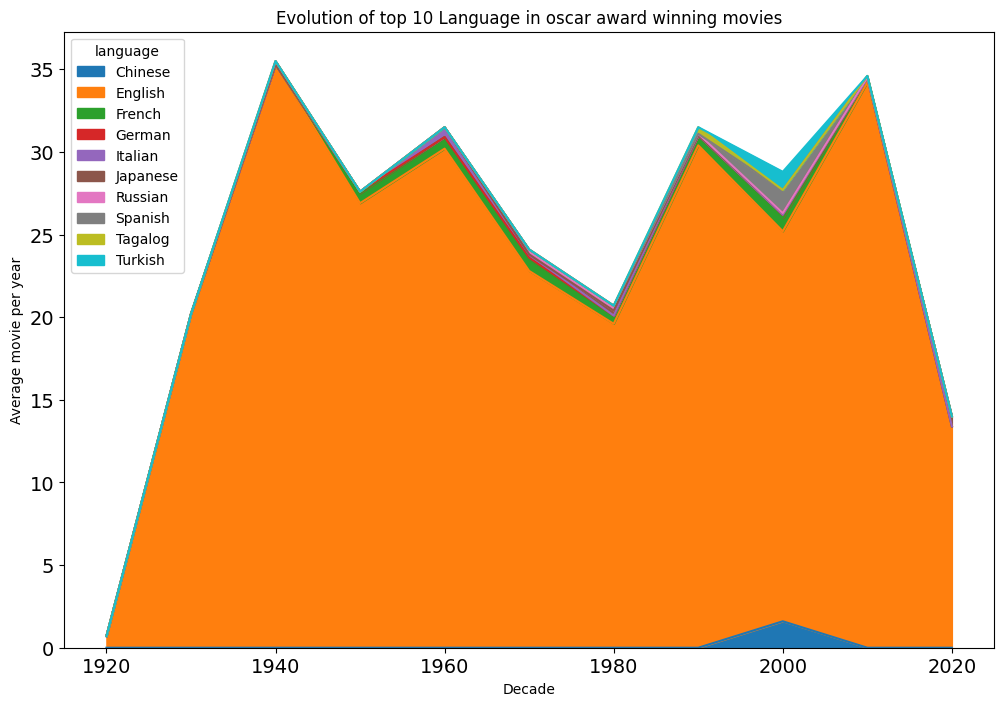

In [41]:
#filter languages with type "language" or "Primary Language"
df_languages_filtered = languages[languages['type'].isin(['Language', 'Primary Language'])]

#merge winning movies with filtered languages
df_winning_movies_languages_filtered = pd.merge(df_winning_movies_genre, df_languages_filtered, left_on='id', right_on='id', how='inner')

#let's create the decade column if not present already
if 'decade' not in df_winning_movies_languages_filtered.columns:
    df_winning_movies_languages_filtered['decade'] = (df_winning_movies_languages_filtered['year_film'] // 10) * 10

#let's ecplore the most popular languages in oscar winning movies
top_10_languages = df_winning_movies_languages_filtered['language'].value_counts().head(10)
df_winning_movies_language_top_10 = df_winning_movies_languages_filtered[df_winning_movies_languages_filtered['language'].isin(top_10_languages.index)]

#group by decade and language
language_counts_over_decade_top_10 = df_winning_movies_language_top_10.groupby(['decade', 'language']).size().unstack(fill_value=0)

#normalizing counts for number of years in a decade
language_counts_norm = language_counts_over_decade_top_10.copy()
for decade in language_counts_norm.index:
        language_counts_norm.loc[decade] /= decade_years[decade]

 #plotting
plt.figure(figsize=(12, 8))
language_counts_norm.plot(
    kind='area',
    stacked=True,
    figsize=(12, 8),
    title="Evolution of top 10 Language in oscar award winning movies",
    fontsize=14
)

plt.xlabel('Decade')
plt.ylabel("Average movie per year")
plt.show()

Let's now look at the dominant genre in every

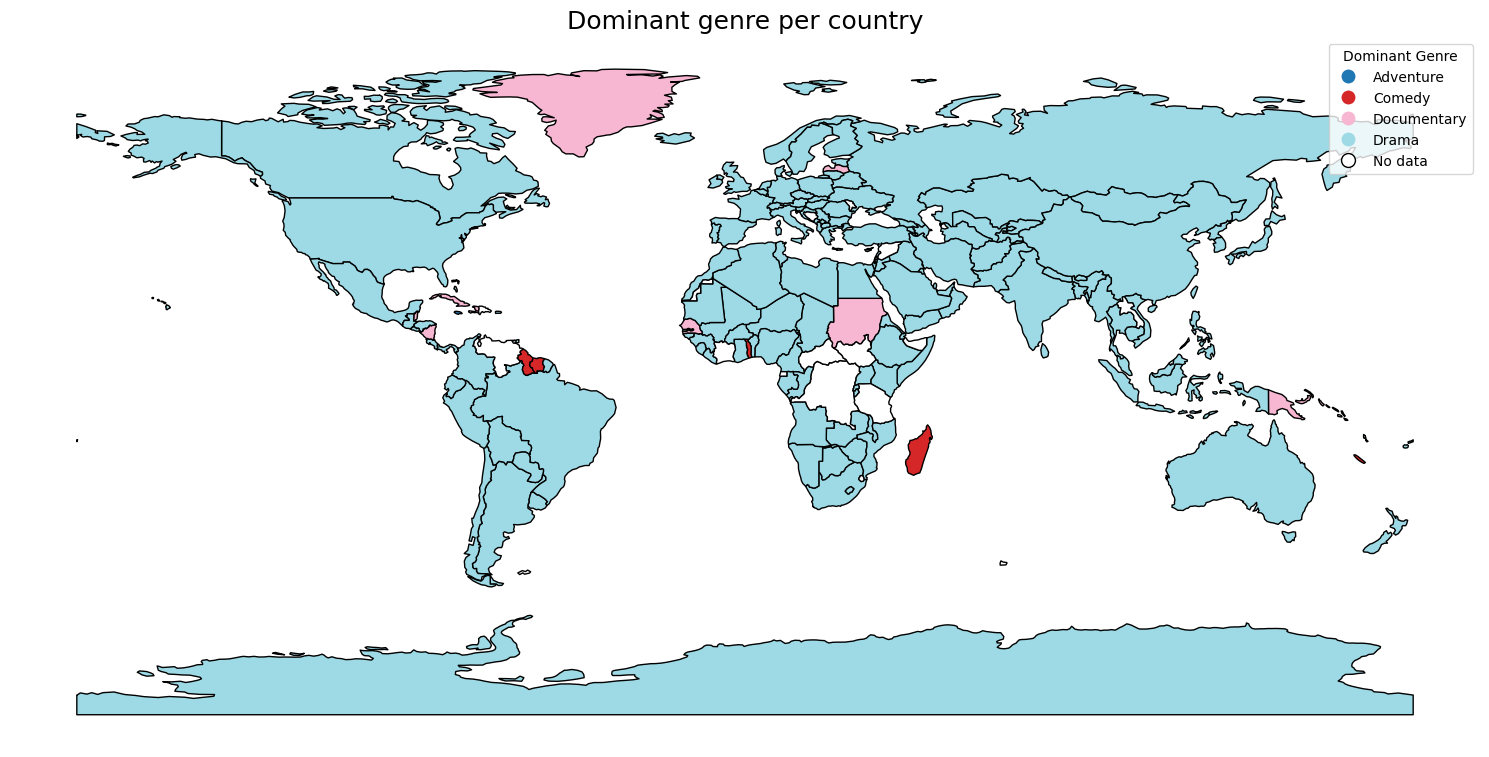

In [43]:
#map the name of some countres to make them pertinent
country_name_mapping ={
    "USSR": "Russia",
    "USA": "United States of America",
    "UK": "United Kingdom",
}
releases['country'] = releases['country'].replace(country_name_mapping)

#merge releases with genre and movies to get the genre per country
releases_genre = releases.merge(movies, left_on='id', right_on='id', how='inner').merge(
    genres, left_on='id', right_on='id', how='inner'
)

#group country and genre to see the frequency
genre_per_country =(
    releases_genre.groupby(['country', 'genre'])
    .size()
    .reset_index(name='count')
)

#let's find the most occurring genre per country
dominant_genre_per_country = genre_per_country.loc[
    genre_per_country.groupby('country')['count'].idxmax()
]

#load the dataset of the coordinates of the world
world_map = gpd.read_file(file_path)

#merge data from genres to the map
world_with_genres = world_map.merge(
    dominant_genre_per_country, how='left', left_on='NAME', right_on='country'
)

#plotting
fig, ax = plt.subplots(1,1, figsize=(15, 10))
world_with_genres.plot(
    column='genre',
    cmap='tab20',
    legend=True,
    legend_kwds={'bbox_to_anchor': (1,1), 'title':'Dominant Genre'},
    missing_kwds={
        "color": "white",
        "label": "No data"
    },
    ax=ax,
    edgecolor='black'
)

ax.set_title("Dominant genre per country", fontsize=18)
ax.set_axis_off()
plt.tight_layout()
plt.show()

What about the dominant genres for Oscar Award winning movies?

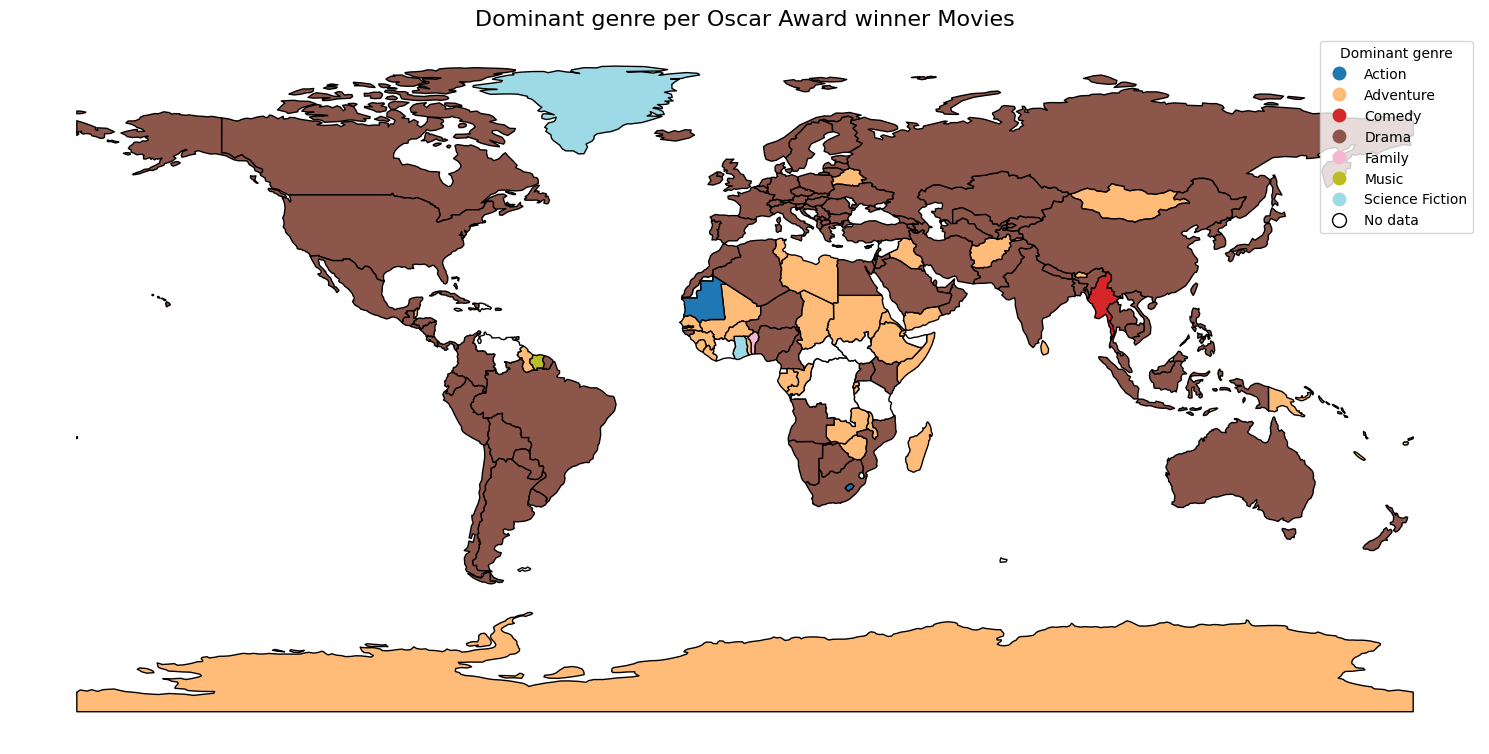

In [45]:
#filter the pscar award winner
oscar_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

#merge with movies dataset to obtain infos on genre and country
oscar_winners_with_movies = oscar_winners.merge(
    movies, left_on=['film', 'year_film'], right_on=['name', 'date'], how='inner'
).merge(
    genres, left_on='id', right_on='id', how='inner'
).merge(
    releases, left_on='id', right_on='id', how='inner'
)

#let's map the states names to be pertinent
country_name_mapping = {
    "USSR": "Russia",
    "USA": "United States of America",
    "UK": "United Kingdom",
}
oscar_winners_with_movies['country'] = oscar_winners_with_movies['country'].replace(country_name_mapping)

#groupbycountry and genre to get the frequency
genre_per_country = (
    oscar_winners_with_movies.groupby(['country', 'genre'])
    .size()
    .reset_index(name='count')
)

#let's find the most frequent genre per country
dominant_genre_per_country = genre_per_country.loc[
    genre_per_country.groupby('country')['count'].idxmax()
]

#load map
world_map = gpd.read_file(file_path)

#merge map with genres
world_with_genres = world_map.merge(
    dominant_genre_per_country, how='left', left_on='NAME', right_on='country'
)

#plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_with_genres.plot(
    column='genre',
    cmap='tab20',
    legend=True,
    legend_kwds={'bbox_to_anchor': (1, 1), 'title': "Dominant genre"},
    missing_kwds={
        "color": "white",
        "label": "No data"
    },
    ax=ax,
    edgecolor='black'
)

ax.set_title("Dominant genre per Oscar Award winner Movies", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

What about the distribution of Oscar winning Movies?

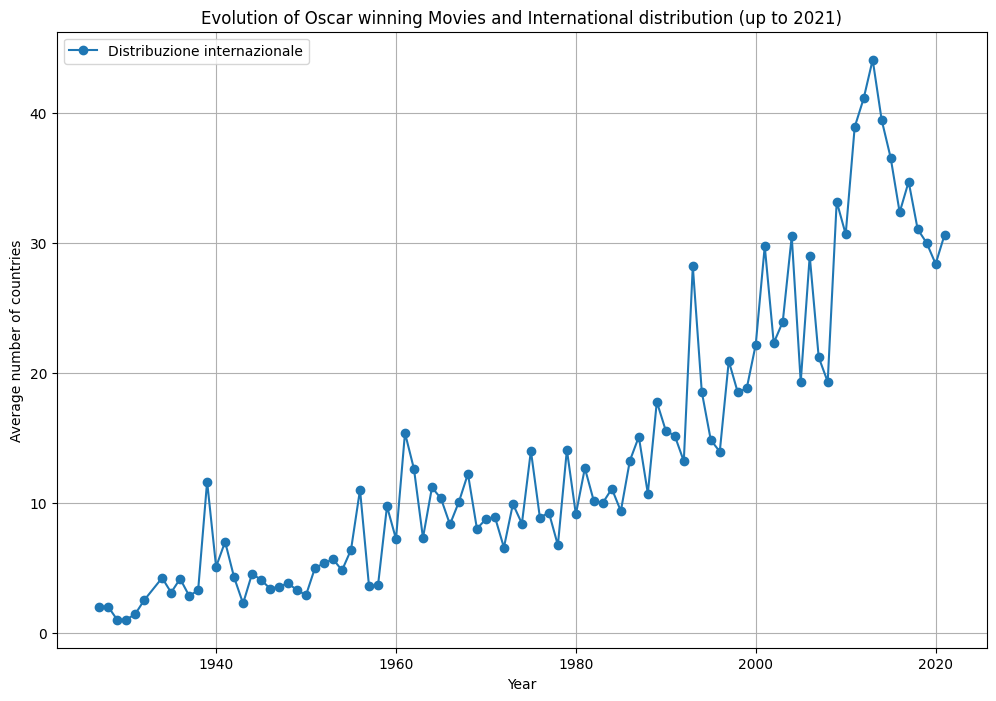

In [46]:
#filter films that had won an oscar
df_oscar_winners = the_oscar_awards[the_oscar_awards['winner'] == True]

#merge with movies dataset to get the IDs
df_winning_movies = pd.merge(
    df_oscar_winners,
    movies,
    left_on=['film', 'year_film'],
    right_on=['name', 'date'],
    how='inner'
)

#erge winning movies with releases to get countries
df_releases_winners = pd.merge(df_winning_movies, releases, left_on='id', right_on='id', how='inner')

#let's count the number of country releases per year
df_countries_per_film = df_releases_winners.groupby(['year_film', 'id']).agg({'country': 'nunique'}).reset_index()
df_countries_per_film.rename(columns={'country': 'num_countries'}, inplace=True)

#average number of country release per year
df_countries_per_year = df_countries_per_film.groupby('year_film').agg({'num_countries': 'mean'}).reset_index()

#filter up to 2021 (after 2021 there's missing data)
df_countries_per_year_2021 = df_countries_per_year[df_countries_per_year['year_film'] <= 2021]

#plotting
plt.figure(figsize=(12, 8))
plt.plot(df_countries_per_year_2021['year_film'], df_countries_per_year_2021['num_countries'], marker='o', label='Distribuzione internazionale')
plt.title("Evolution of Oscar winning Movies and International distribution (up to 2021)")
plt.xlabel("Year")
plt.ylabel("Average number of countries")
plt.legend()
plt.grid()
plt.show()

Now, there's two major oscar winning genres...let's see how they have evolved

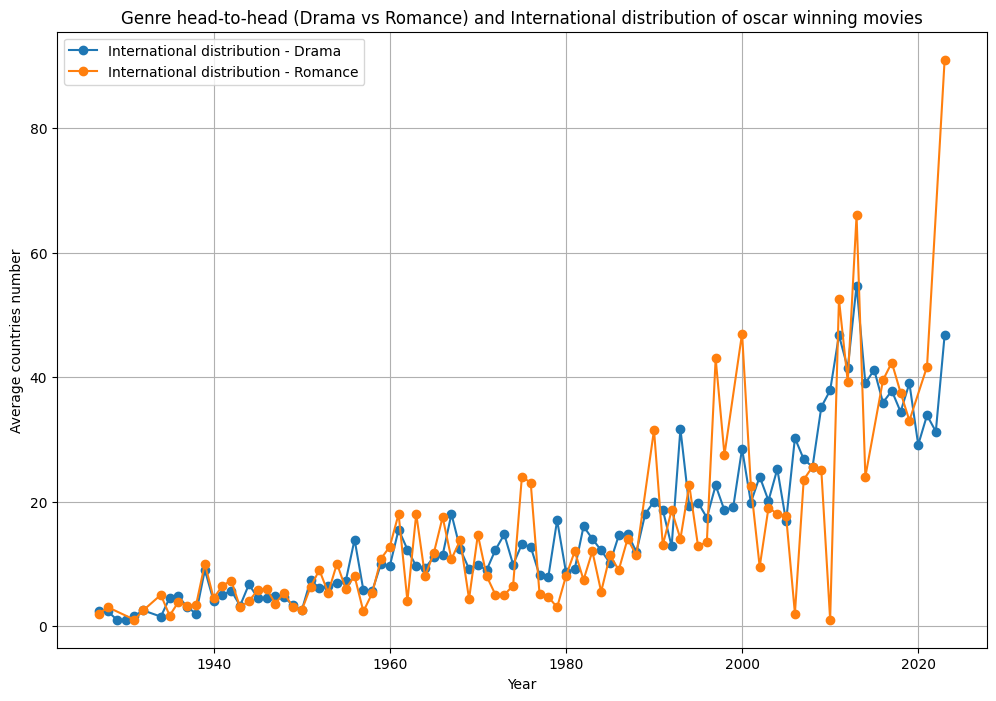

In [49]:
#merge winning movies with genres
df_winning_movies_genre = pd.merge(df_winning_movies, genres, left_on='id', right_on='id', how='inner')

#merge with releases to get the countries
df_releases_winners = pd.merge(df_winning_movies_genre, releases, left_on='id', right_on='id', how='inner')

#filter for specific genres
selected_genres = ['Drama', 'Romance']
df_selected_genres = df_releases_winners[df_releases_winners['genre'].isin(selected_genres)]

#count the number of release countries for each film
df_countries_per_film = df_selected_genres.groupby(['year_film', 'id', 'genre']).agg({'country':'nunique'}).reset_index()
df_countries_per_film.rename(columns={'country': 'num_countries'}, inplace=True)

#calculating the average number of release countries per year in every genre
df_countries_per_year_and_genre = df_countries_per_film.groupby(['year_film', 'genre']).agg({'num_countries': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for genre in selected_genres:
    genre_data = df_countries_per_year_and_genre[df_countries_per_year_and_genre['genre'] == genre]
    plt.plot(genre_data['year_film'], genre_data['num_countries'], marker='o', label=f'International distribution - {genre}')
    
plt.title("Genre head-to-head (Drama vs Romance) and International distribution of oscar winning movies")
plt.xlabel("Year")
plt.ylabel("Average countries number")
plt.legend()
plt.grid()
plt.show()


Ok we've understood that romance has been at the top following the 2000s, now let's settle this once and for all with a triple-header (Drama, Romance, Comedy)

<Figure size 3000x1000 with 0 Axes>

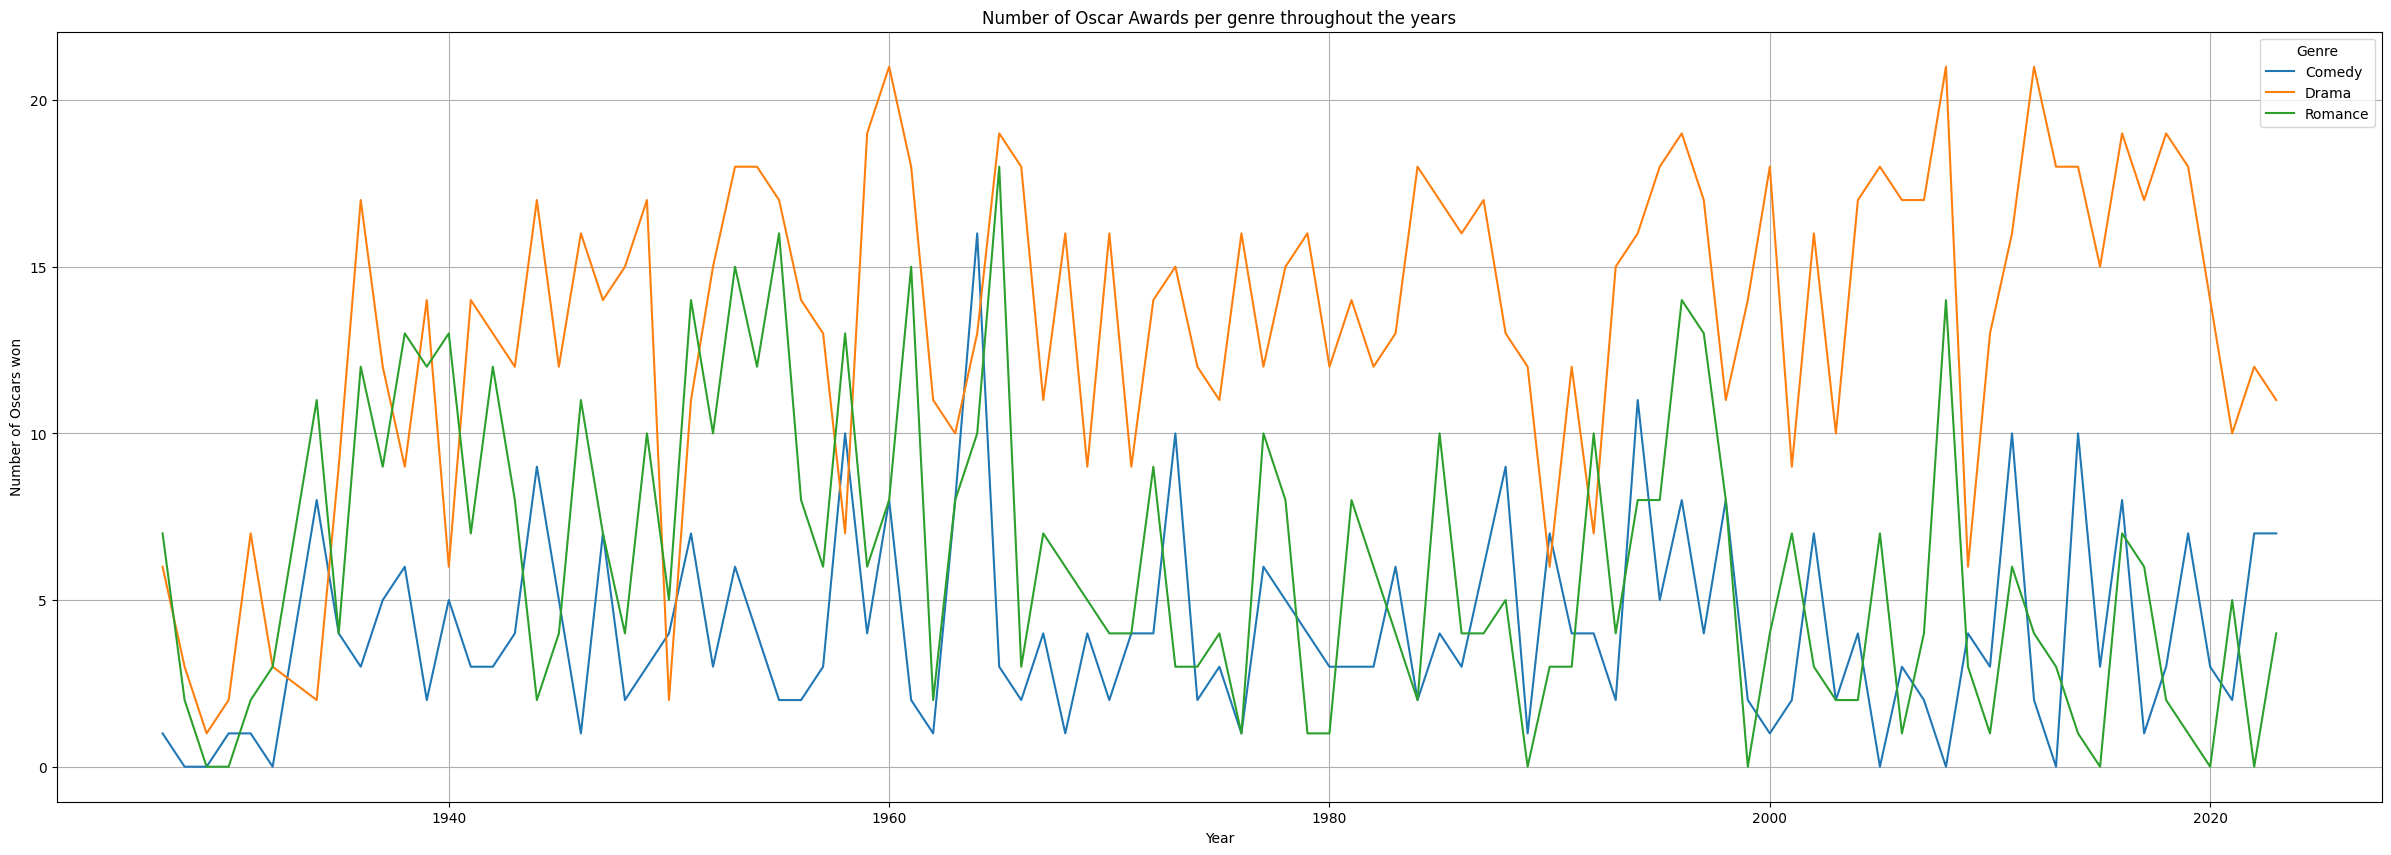

In [51]:
#top 3 genres with most oscars
top_3_genres = df_winning_movies_genre['genre'].value_counts().head(3).index
df_top_3_genres = df_winning_movies_genre[df_winning_movies_genre['genre'].isin(top_3_genres)]

#groupby year and genre and count winning mvies
df_genre_wins = df_top_3_genres.groupby(['year_film', 'genre']).size().unstack(fill_value=0)

#plotting
plt.figure(figsize=(30, 10))
df_genre_wins.plot(kind='line', figsize=(30,10), title="Number of Oscar Awards per genre throughout the years")
plt.ylabel('Number of Oscars won')
plt.xlabel('Year')
plt.grid()
plt.legend(title="Genre")
plt.show()

We're ready to focus on the Oscars and Studios datasets

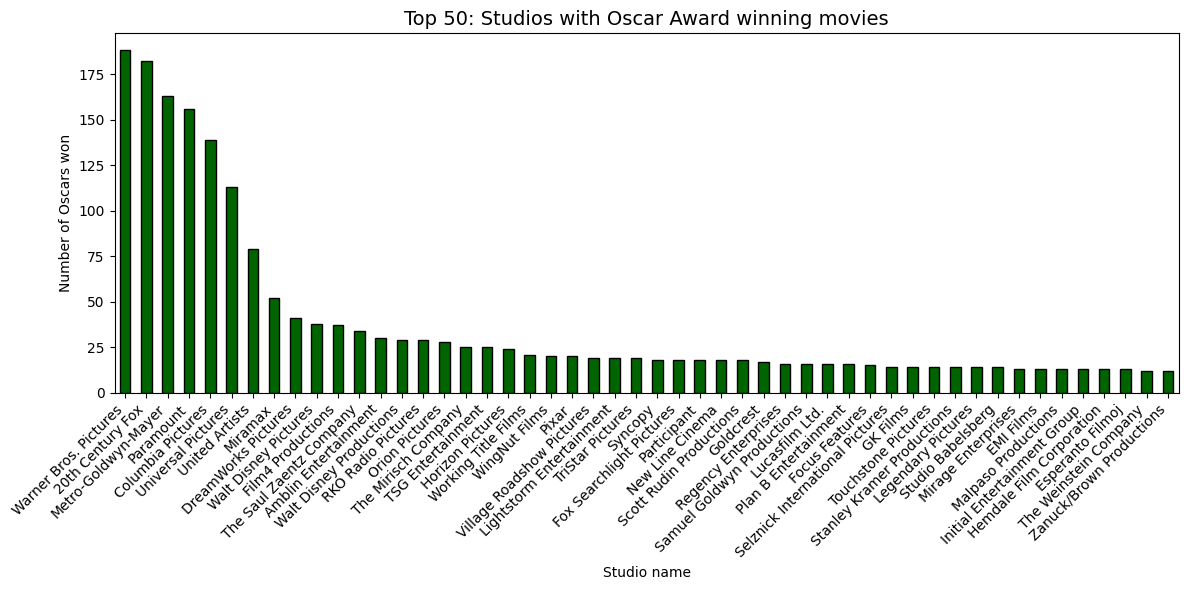

In [55]:
#let's merge the two datasets
df_movies_with_oscar = pd.merge(
    movies,
    the_oscar_awards,
    left_on=["name", 'date'],
    right_on=["film", 'year_film'],
    how='inner'
)

#let's merge it with studios
df_movies_with_studios = pd.merge(df_movies_with_oscar, studios, on='id', how='inner')

#let's filter them by award winning movies
df_winning_movies = df_movies_with_studios[df_movies_with_studios['winner'] == True]

#let's count the Oscars won by every studio
oscar_counts_by_studio = df_winning_movies['studio'].value_counts()

#only top 50 to be selected
top_50_studios = oscar_counts_by_studio.head(50)

#plotting
plt.figure(figsize=(12,6))
top_50_studios.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Top 50: Studios with Oscar Award winning movies', fontsize=14)
plt.xlabel("Studio name")
plt.ylabel("Number of Oscars won")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Warner Bros., 20Th Century just destroyed the competition...expected, they are the most famous production studios in the world. Columbia pictures is following not too far behind though as well as Paramount pictures and Paramount.

Now we'll analyze the distribution of the movies (abroad) of the top 50 studios, against their possible success as Oscar award winners...or not.

Correlation coefficient between Average Movie distributio and Oscars won is: -0.31


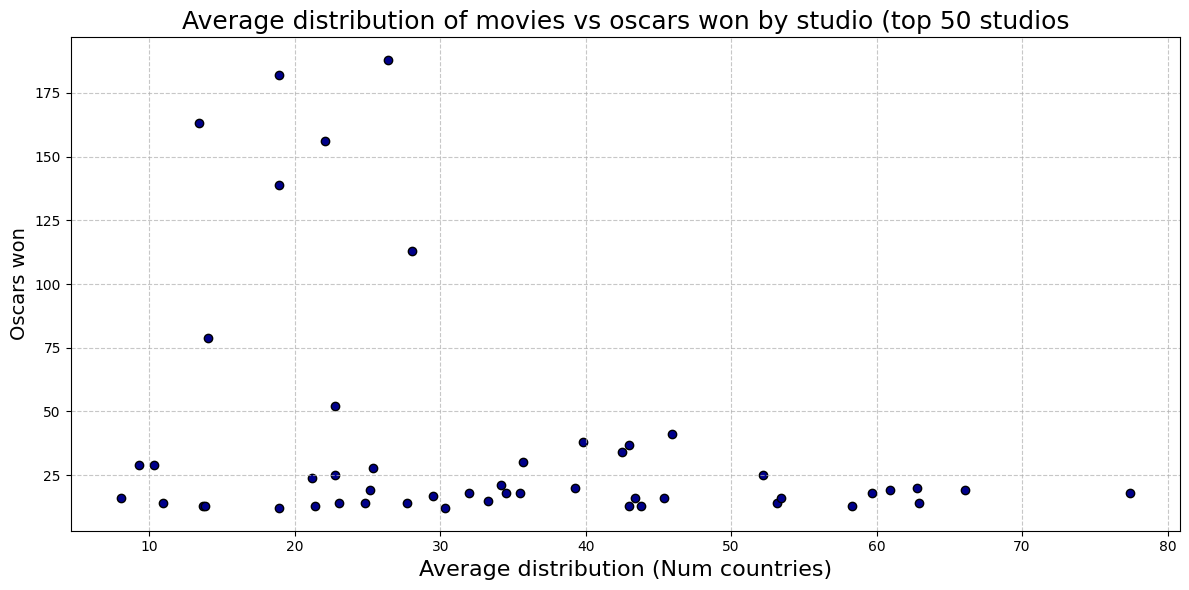

In [56]:
#merge oscar awrds with movies
df_oscar_winners = the_oscar_awards[the_oscar_awards['winner'] == True] #just the winners
df_movies_with_oscar = pd.merge(df_oscar_winners, movies, left_on=['film', 'year_film'], right_on=['name', 'date'], how='inner')

#connect winners with studios
df_movies_with_studios = pd.merge(df_movies_with_oscar, studios, on='id', how='inner')

#now let's count the oscars won by studio
oscar_counts_by_studio = df_movies_with_studios['studio'].value_counts().reset_index()
oscar_counts_by_studio.columns = ['studio', 'oscar_wins']

#top 50 studios
top_50_studios = oscar_counts_by_studio.head(50)

#connect distributed movies with releases
movies_with_release = pd.merge(movies, releases, on='id', how='inner')
movies_country_count = movies_with_release.groupby('id')['country'].nunique().reset_index()
movies_country_count.columns = ['id', 'num_countries']

#avg distribution for top 50 studios
movies_with_countries_and_studios = pd.merge(
    df_movies_with_studios, 
    movies_country_count,
    on='id',
    how='inner'
)

#filter top 50 studios
movies_with_countries_and_studios = movies_with_countries_and_studios[movies_with_countries_and_studios['studio'].isin(top_50_studios['studio'])]

#avg release countries per each studio
avg_countries_per_studio = movies_with_countries_and_studios.groupby('studio')['num_countries'].mean().reset_index()
avg_countries_per_studio.columns = ['studio', 'avg_countries']

#unifying data from avg_countries and top_50_studios
studio_analysis = pd.merge(avg_countries_per_studio, top_50_studios, on='studio', how='inner')

#correlation between them
correlation = studio_analysis['avg_countries'].corr(studio_analysis['oscar_wins'])
print(f"Correlation coefficient between Average Movie distributio and Oscars won is: {correlation:.2f}")

#plotting
plt.figure(figsize=(12,6))
plt.scatter(studio_analysis['avg_countries'], studio_analysis['oscar_wins'], color='darkblue', edgecolor='black')
plt.title('Average distribution of movies vs oscars won by studio (top 50 studios', fontsize=18)
plt.xlabel('Average distribution (Num countries)', fontsize=16)
plt.ylabel('Oscars won', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Cefficient is negative in this case...this means that not every studio is able to produce a movie abroad and still win an oscar. If we excluded the top 5 studios from the analysis the coiefficient wouldn't be negative, but still, the markers tend towards zero, the most, this means that even if the correlation was higher, the coefficient wouldn't be extremely high.

Now let's analyze the correlation between the distribution of the movies abroad and possibility of success of wining an oscar award

Correlation value corresponds to: 0.26447730648815726
P-Value is: 6.605312564684093e-20


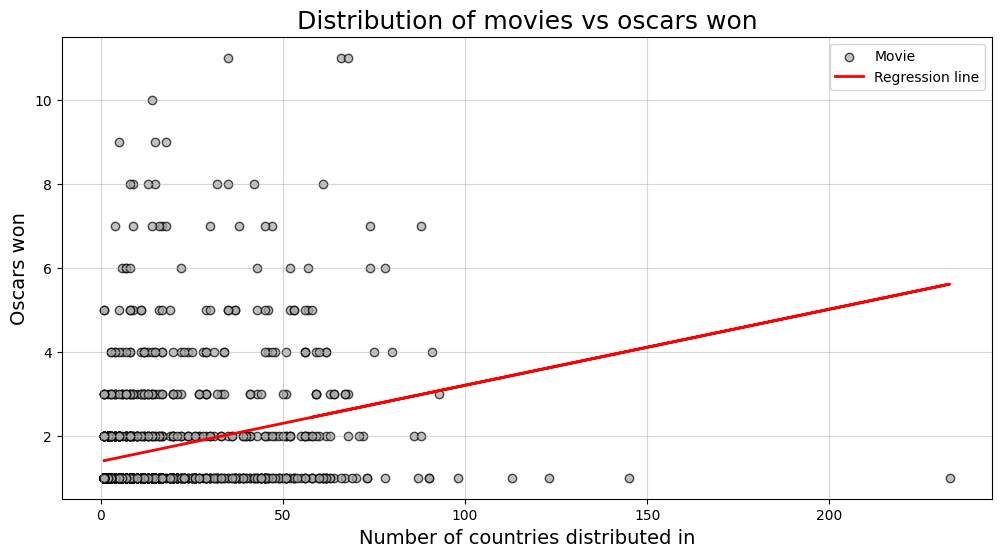

In [58]:
#number of countries per movies
countries_per_movie = releases.groupby('id')['country'].nunique().reset_index()
countries_per_movie.rename(columns={'country':'num_countries'}, inplace=True)

#number of oscars won per movie
oscars_per_movie = the_oscar_awards[the_oscar_awards['winner']].groupby(['film', 'year_film']).size().reset_index(name='oscar_count')

#connect countries with oscars
oscars_with_ids = pd.merge(oscars_per_movie, movies[['id', 'name', 'date']], left_on=['film', 'year_film'], right_on=['name', 'date'], how='inner')

#unifying countries with oscar count
movie_distribution_vs_oscars = pd.merge(countries_per_movie, oscars_with_ids[['id', 'oscar_count']], on='id', how='inner')

#PEARSON'S CORRELATION
#we can test whether there is a significant relationship between
#the distribution of the movies abroad and possibility of success of wining an oscar award

correlation, p_value = pearsonr(movie_distribution_vs_oscars['num_countries'], movie_distribution_vs_oscars['oscar_count'])

print(f"Correlation value corresponds to: {correlation}")
print(f"P-Value is: {p_value}")

#time to plot
plt.figure(figsize=(12,6))
plt.scatter(movie_distribution_vs_oscars['num_countries'], movie_distribution_vs_oscars['oscar_count'], alpha=0.7, color='darkgrey', edgecolor='black', label='Movie')

#regression line
#represents the relationship between
#the distribution of the movies abroad and 
#possibility of success of wining an oscar award

slope, intercept = np.polyfit(movie_distribution_vs_oscars['num_countries'], movie_distribution_vs_oscars['oscar_count'], 1)
plt.plot(movie_distribution_vs_oscars['num_countries'], slope * movie_distribution_vs_oscars['num_countries'] + intercept, color = "red", linewidth=2, label="Regression line")

plt.title('Distribution of movies vs oscars won', fontsize=18)
plt.xlabel('Number of countries distributed in', fontsize=14)
plt.ylabel('Oscars won', fontsize=14)
plt.grid(True, alpha=0.5)

plt.legend()
plt.show()

NOW, let'ss build a heatmap of the top 10 studios

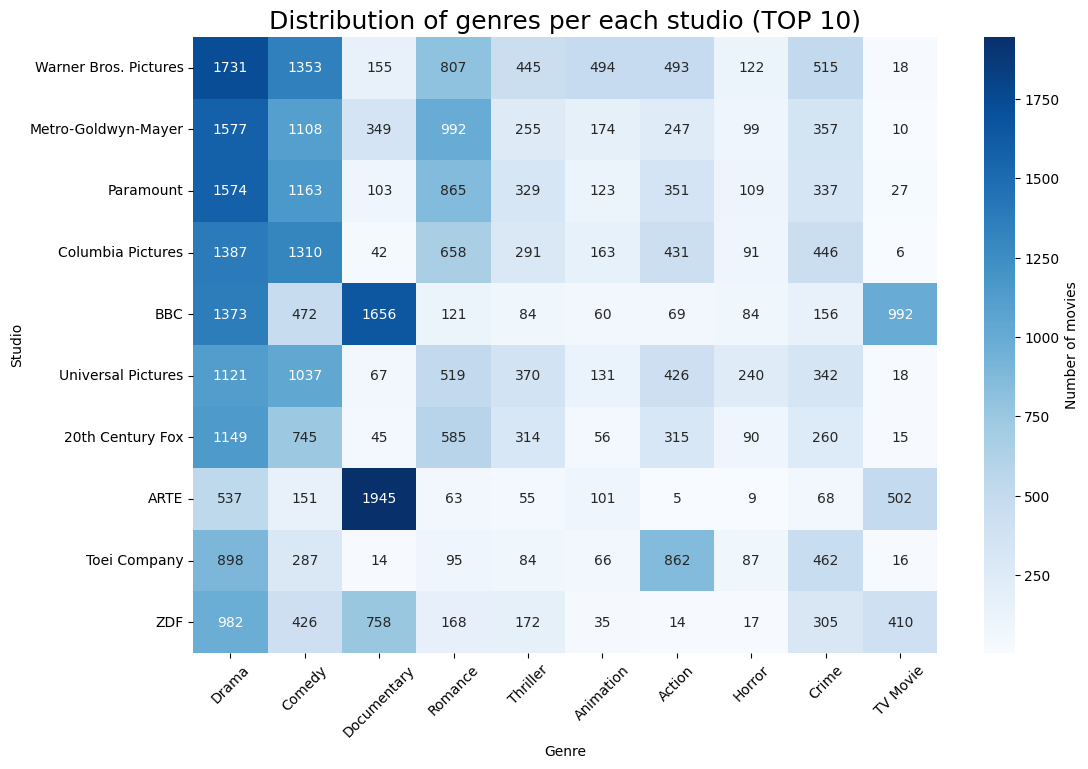

In [60]:
#movies and genres merged to obtain the top grossing genre per studio
merged_movies_genres = pd.merge(movies[['id', 'name']], genres,  on='id', how='left')

#now movies and studios merged to obtain the studio per each film
merged_movies_studios = pd.merge(merged_movies_genres, studios[['id', 'studio']], on='id', how='left')

#merged again with oscar awards to obtain the number of prizes
merged_data = pd.merge(merged_movies_studios, the_oscar_awards[['film', 'category']], left_on='name', right_on='film', how='left')

#group data by studio and genre and count nuber of movies
genre_studio_counts = merged_data.groupby(['studio', 'genre']).size().unstack(fill_value=0)

#top studios and genres
top_studios = genre_studio_counts.sum(axis=1).nlargest(10).index
top_genres = genre_studio_counts.sum(axis=0).nlargest(10).index

#filter data to just visualize top 10 studios and genres
genre_studio_counts_filtered = genre_studio_counts.loc[top_studios, top_genres]

#plotting
plt.figure(figsize=(12,8))
sns.heatmap(genre_studio_counts_filtered, annot=True, fmt="d", cmap="Blues", cbar_kws={'label':'Number of movies'})
plt.title('Distribution of genres per each studio (TOP 10)', fontsize=18)
plt.xlabel('Genre')
plt.ylabel('Studio')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

And now time for the top 3 genres produced by the biggest studios

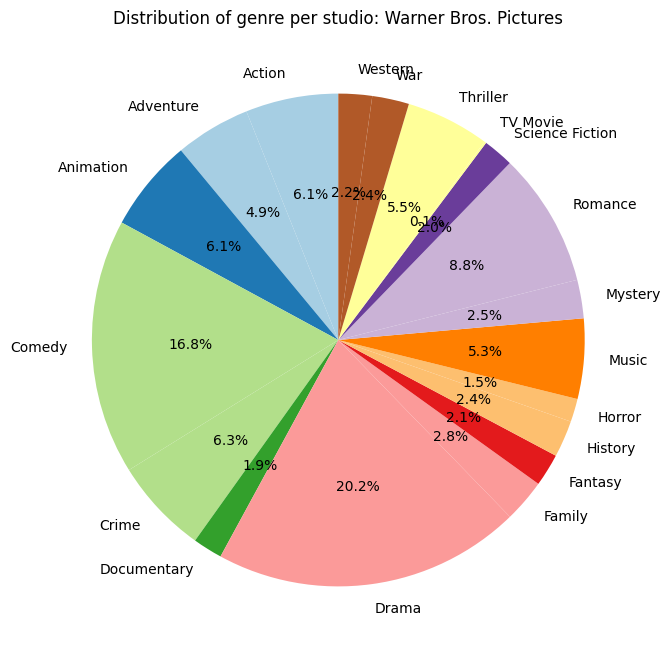

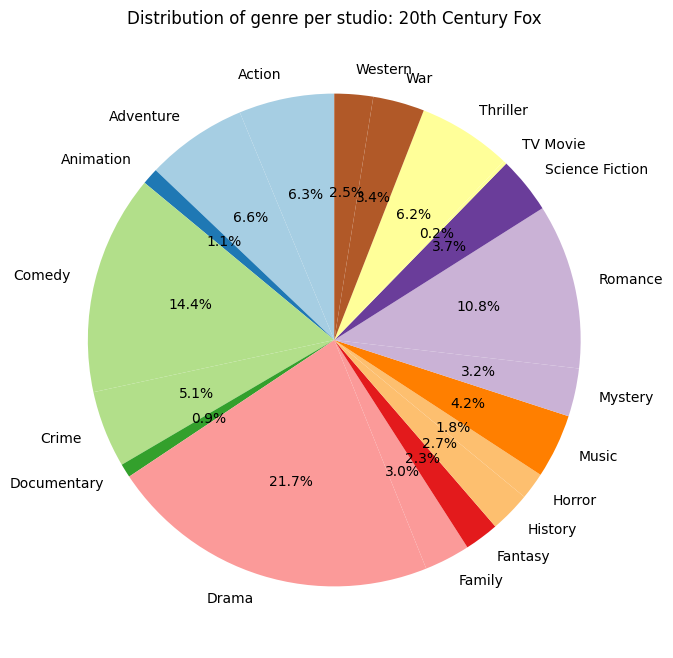

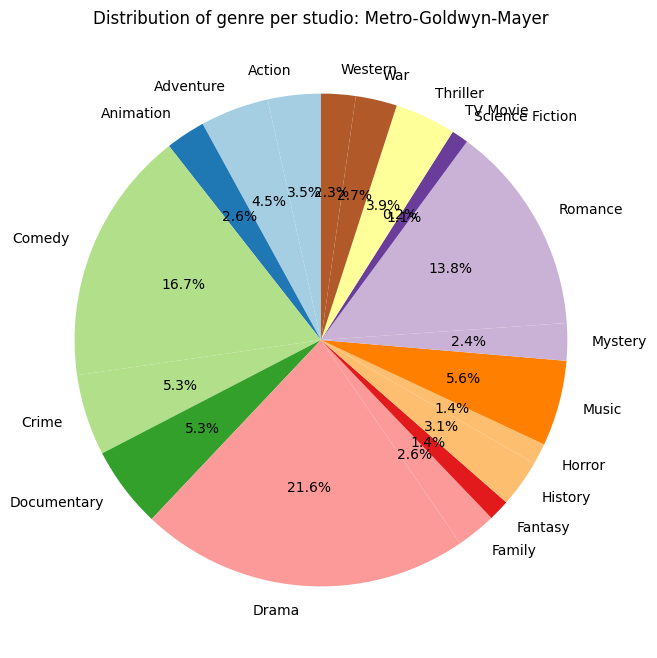

In [63]:
#unifying ncessary dataset
merged_movies_genres = pd.merge(movies[['id', 'name', 'date']], genres, on='id', how='left')
merged_movies_studios = pd.merge(merged_movies_genres, studios[['id', 'studio']], on='id', how='left')
merged_data = pd.merge(merged_movies_studios, the_oscar_awards[['film', 'winner', 'year_film']], left_on=['name', 'date'], right_on=['film', 'year_film'], how='left')

#winner data
winner_data = merged_data[merged_data['winner']==True]

#groupby studios and count oscars won
oscar_counts = winner_data.groupby('studio').size().sort_values(ascending=False)


#select top 3 studios based on oscars won
top_3_studios = oscar_counts.nlargest(3).index

#grouping by studio and genre, the counting number of movies
genre_studio_counts = merged_data.groupby(['studio', 'genre']).size().unstack(fill_value=0)

#3 different plots for the top 3 studios
for studio in top_3_studios:
    studio_genre_dist = genre_studio_counts.loc[studio]

    plt.figure(figsize=(10,8))
    studio_genre_dist.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Paired')
    plt.title(f'Distribution of genre per studio: {studio}')
    plt.ylabel('')
    plt.show()

Perfect, now we can start analysing the reviews, but first let's clean them

In [65]:
#let's normalize the marks given
def normalize_marks(val):
    if pd.isna(val):
        return val
    elif '/' in str(val):
        try:
            numerator, denominator = map(float, val.split('/'))
            if denominator == 0:
                return np.nan
            if(numerator/denominator) > 1:
                return np.nan
            return numerator/denominator
        except ValueError:
            return np.nan
    elif str(val).replace('.', '', 1).isdigit():
        try:
            num = float(val)
            if 0 <= num <= 1:
                return num
            else:
                return np.nan
        except ValueError:
            return np.nan
    else:
        american_grades = {
            'A': 1.0,
            'A-': 0.9,
            'B+': 0.85, 'B': 0.8, 'B-': 0.75,
            'C+': 0.7, 'C': 0.65, 'C-': 0.6,
            'D+': 0.55, 'D': 0.5, 'D-': 0.45,
            'F+': 0.25, 'F': 0.0
        }
        return american_grades.get(val.strip(), np.nan)
rotten_tomatoes_reviews['review_score'] = rotten_tomatoes_reviews['review_score'].apply(normalize_marks)

How do the reviews distribute themselves, let's check

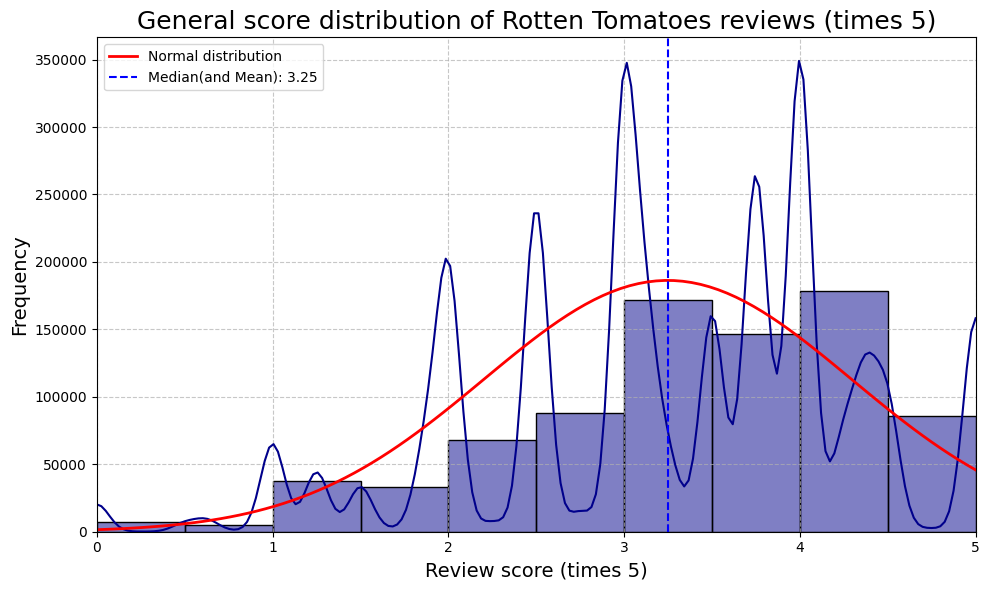

In [67]:
#reviews that go from 1 to 5
rotten_tomatoes_reviews['adjusted_review_score'] = rotten_tomatoes_reviews['review_score']*5

#plotof rotten tomatoes review
plt.figure(figsize=(10,6))
sns.histplot(rotten_tomatoes_reviews['adjusted_review_score'], kde=True, color='darkblue', bins=10)

#calculating mean and standard deviation of the grades
mean_score = rotten_tomatoes_reviews['adjusted_review_score'].mean()
std_score = rotten_tomatoes_reviews['adjusted_review_score'].std()

x = np.linspace(0, 5, 100)

#density of normal distribution with mean and std
pdf = stats.norm.pdf(x, mean_score, std_score)

scaling_factor = len(rotten_tomatoes_reviews['adjusted_review_score']) * (x[1] - x[0])
pdf = pdf * scaling_factor * 0.00015

plt.plot(x, pdf * len(rotten_tomatoes_reviews['adjusted_review_score']) * (x[1] - x[0]), color='red', lw=2, label='Normal distribution')

#add median to normal distribution
plt.axvline(mean_score, color='blue', linestyle='--', label =f'Median(and Mean): {mean_score:.2f}')

plt.title("General score distribution of Rotten Tomatoes reviews (times 5)", fontsize=18)
plt.xlabel('Review score (times 5)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xlim(0,5)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.legend()
plt.show()

WHAT do the critics worldwide think about?

/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/2700953665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rotten_tomatoes_reviews, x = 'top_critic', y = 'adjusted_review_score', palette='coolwarm')


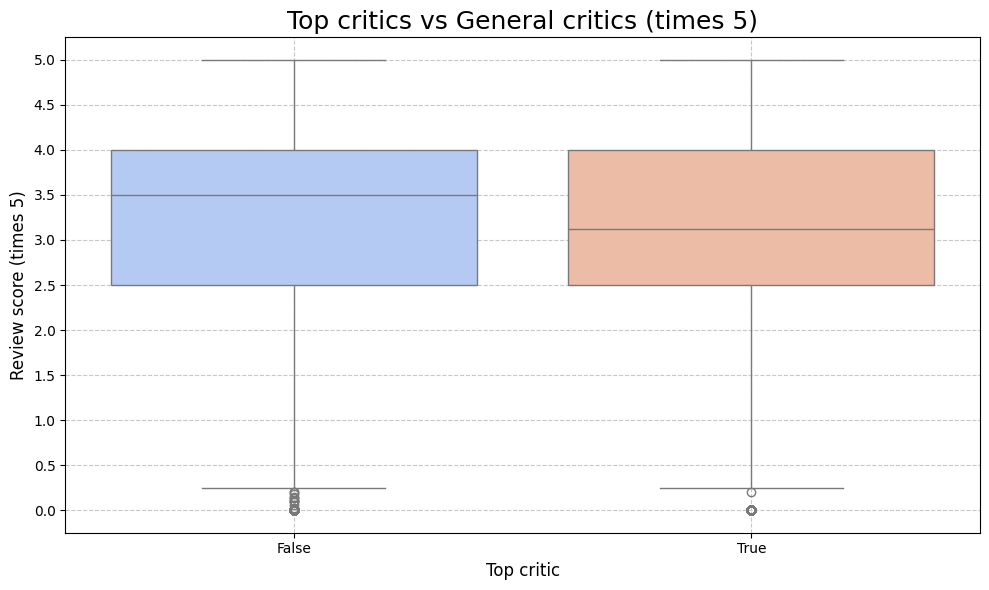

In [70]:
#plotting of rotting tomatoes reviews
plt.figure(figsize=(10,6))
sns.boxplot(data=rotten_tomatoes_reviews, x = 'top_critic', y = 'adjusted_review_score', palette='coolwarm')

plt.title('Top critics vs General critics (times 5)', fontsize=18)
plt.xlabel('Top critic', fontsize=12)
plt.ylabel('Review score (times 5)', fontsize=12)

plt.yticks(np.arange(0, rotten_tomatoes_reviews['adjusted_review_score'].max()+0.5, 0.5))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Average rating per eache genre (on a 0 to 5 scale)

/var/folders/ds/_pqz_cb97_x25y3ph5vp73nr0000gn/T/ipykernel_7809/49729151.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_per_genre, x = 'adjusted_review_score', y = 'genre', palette='viridis')


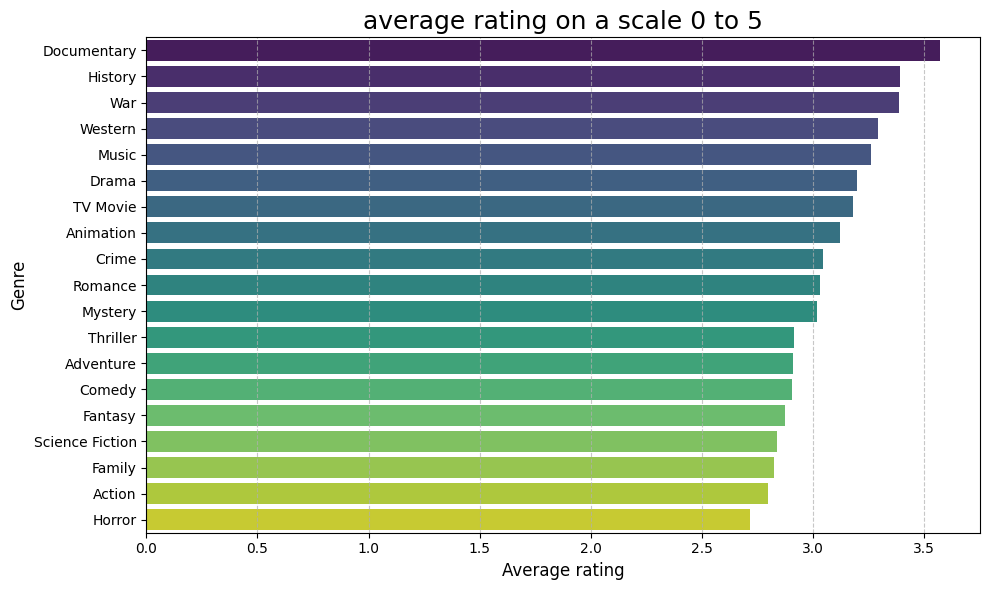

In [72]:
#avg review_score per movie
avergae_review_per_movie = rotten_tomatoes_reviews.groupby(['rotten_tomatoes_link', 'movie_title'])['adjusted_review_score'].mean().reset_index()

#merge results with movies to get the id
movies_reviews = pd.merge(avergae_review_per_movie, movies, left_on='movie_title', right_on='name')

#delete entries with duplicate name
movies_reviews = movies_reviews[~movies_reviews['name'].duplicated(keep=False)]

#merge result with genre by id
movies_review_genre = pd.merge(movies_reviews, genres, on='id')

#average mean of review_score per genre
rating_per_genre = movies_review_genre.groupby('genre')['adjusted_review_score'].mean().sort_values(ascending=False).reset_index()

#plotting
plt.figure(figsize=(10,6))
sns.barplot(data=rating_per_genre, x = 'adjusted_review_score', y = 'genre', palette='viridis')

plt.title("average rating on a scale 0 to 5", fontsize=18)
plt.xlabel('Average rating', fontsize=12)
plt.ylabel("Genre", fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

What about the grade based on the year of release?

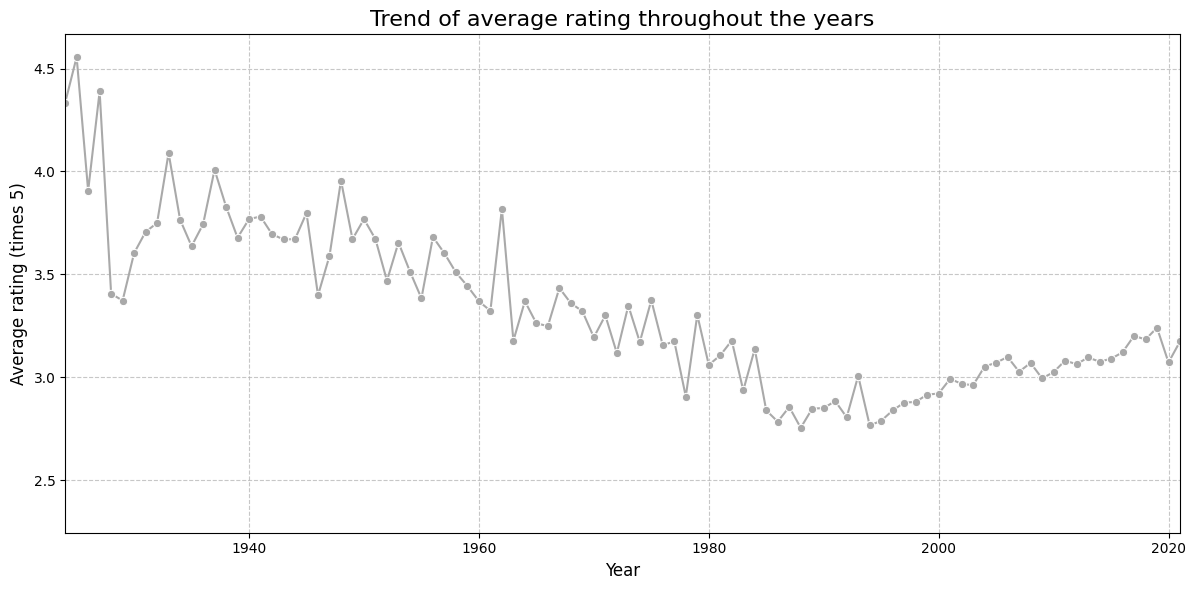

In [73]:
#average grading per year
rating_by_year = movies_reviews.groupby('date')['adjusted_review_score'].mean().reset_index()

#plotting
plt.figure(figsize=(12,6))
sns.lineplot(data=rating_by_year, x='date', y='adjusted_review_score', marker='o', color='darkgrey')

plt.title("Trend of average rating throughout the years", fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average rating (times 5)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.xlim(1924, 2021)
plt.show()



WHAT ABOUT the reviews of rotten tomatoes with the ones from our main dataset

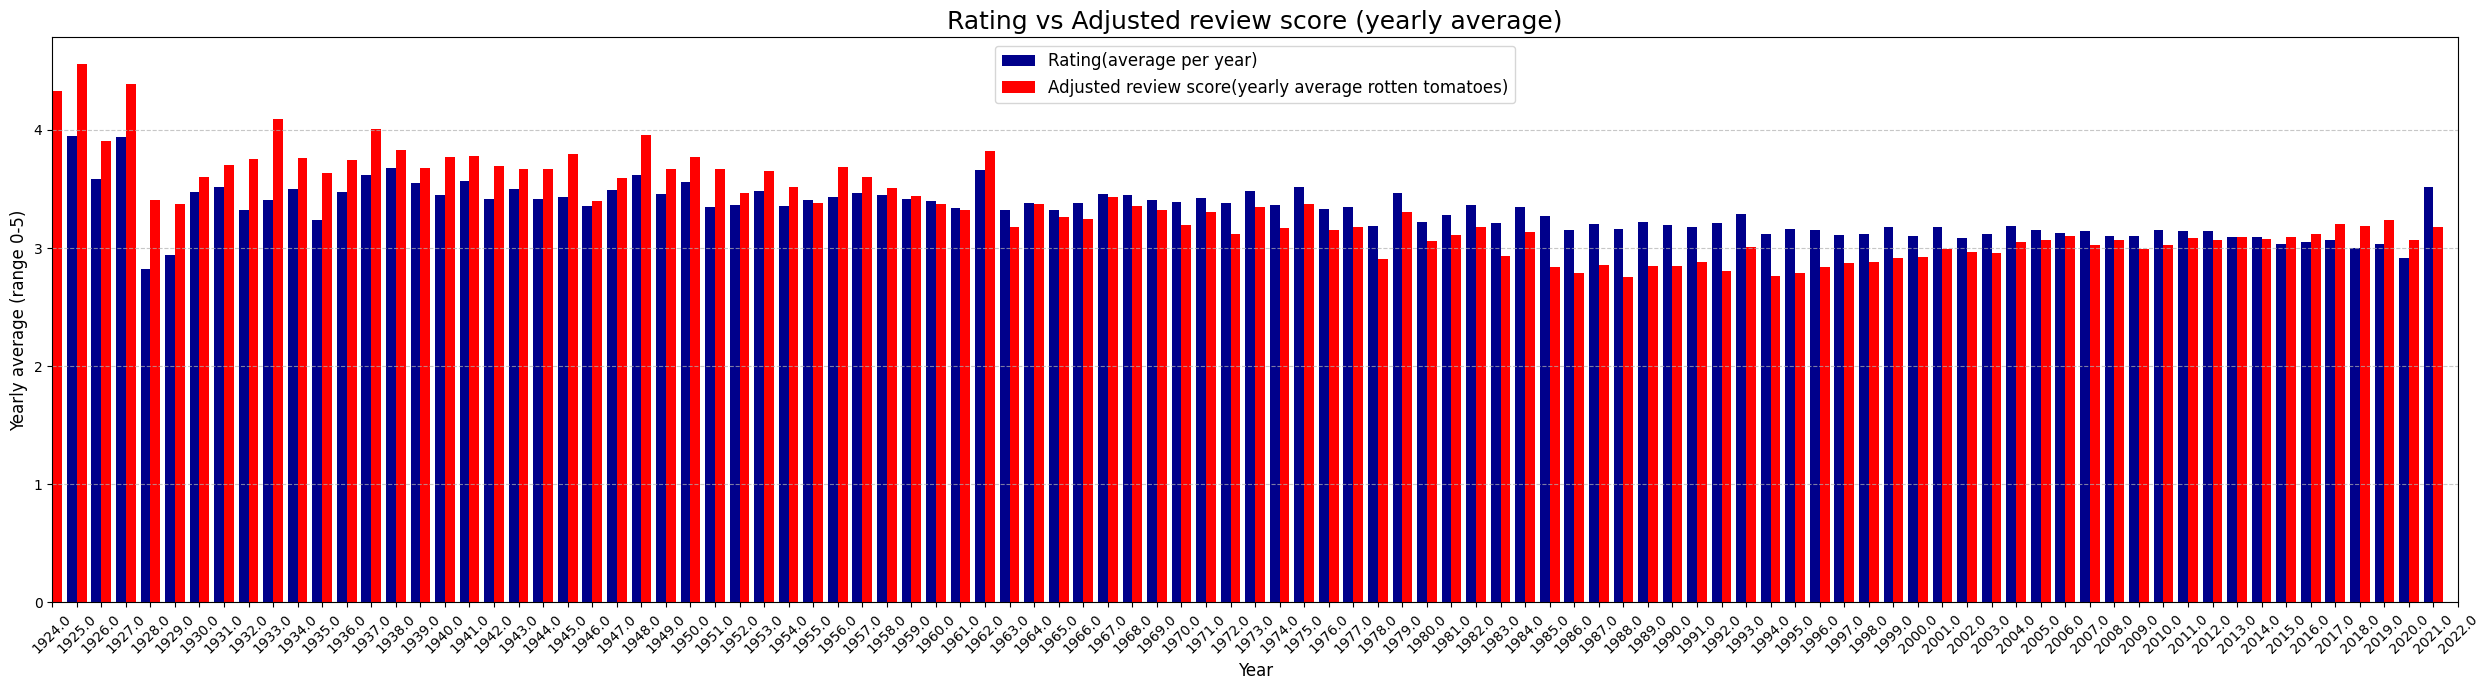

In [77]:
#calcukate review mean per year, not the rotten tomatoes ones, the ones from movies.csv
rating_by_year_no_rotten = movies_reviews.groupby('date')['rating'].mean().reset_index()

#graph
plt.figure(figsize=(25,7))

#to be able to see it clearly we set some measures
bar_width = 0.4
x = np.arange(len(rating_by_year['date']))

#plotting rating by year no rotten tomatoes
plt.bar(x - bar_width/2, rating_by_year_no_rotten['rating'], width=bar_width, color='darkblue', label='Rating(average per year)')

#plotting of rating by year
plt.bar(x + bar_width/2, rating_by_year['adjusted_review_score'], width=bar_width, color='red', label='Adjusted review score(yearly average rotten tomatoes)')


plt.title("Rating vs Adjusted review score (yearly average)", fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Yearly average (range 0-5)', fontsize=12)
plt.xticks(x, rating_by_year['date'], rotation = 45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlim(rating_by_year['date'].searchsorted(1925) - 1, rating_by_year['date'].searchsorted(2021) + 1)
plt.tight_layout()
plt.show()

CORRELATION bewtween most oscar award winning movies and their rating

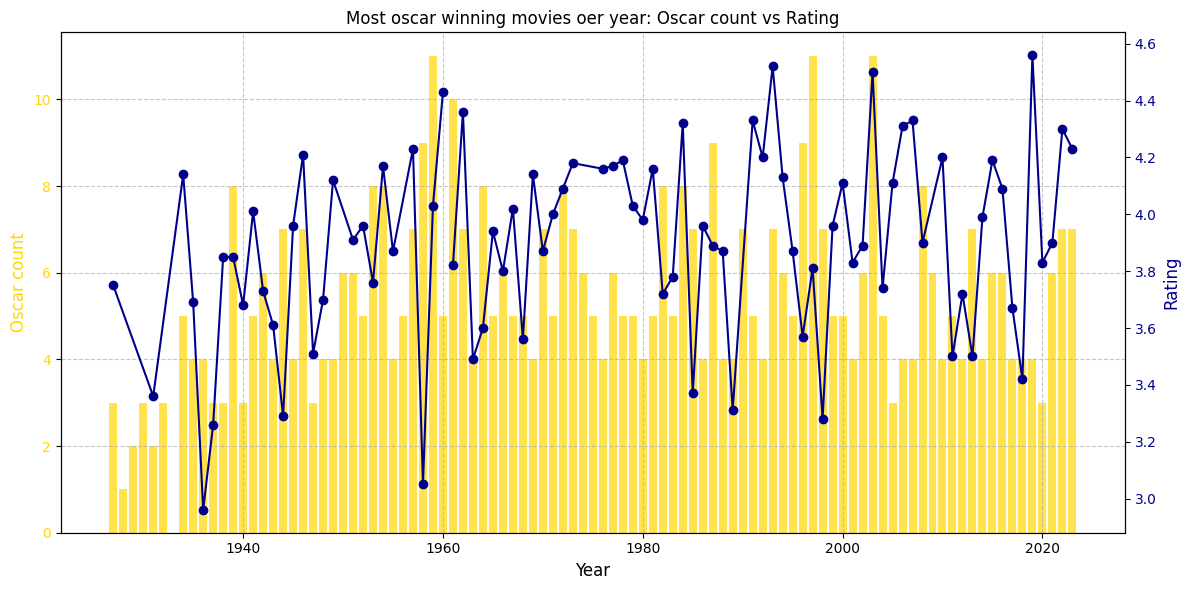

In [81]:
#only oscar winners
oscar_wins = the_oscar_awards[the_oscar_awards['winner'] == True]

#counting the number of oscars per movie and year
oscar_count = (
    oscar_winners.groupby(['year_film','film'])
    .size()
    .reset_index(name='oscar_count')
)

#top oscar movies
top_oscar_movies = oscar_count.loc[oscar_count.groupby('year_film')['oscar_count'].idxmax()]

#merge top oscar movies with rating
top_oscar_movies_with_rating = pd.merge(
    top_oscar_movies, movies, left_on=['film', 'year_film'], right_on=['name', 'date'], how='inner'
)

#sort by year
top_oscar_movies_with_rating = top_oscar_movies_with_rating.sort_values('year_film')

#plotting of top oscar movies with rating
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(
    top_oscar_movies['year_film'],
    top_oscar_movies['oscar_count'],
    color='gold',
    alpha=0.7,
    label='Oscar count'
)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Oscar count', color='gold', fontsize=12)
ax1.tick_params(axis='y', labelcolor='gold')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2 = ax1.twinx()
ax2.plot(
    top_oscar_movies_with_rating['year_film'],
    top_oscar_movies_with_rating['rating'],
    color='darkblue',
    marker='o',
    label='Rating'
)

ax2.set_ylabel('Rating',color='darkblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkblue')

plt.title('Most oscar winning movies oer year: Oscar count vs Rating')
fig.tight_layout()
plt.show()


Oscar nomiated and Winners

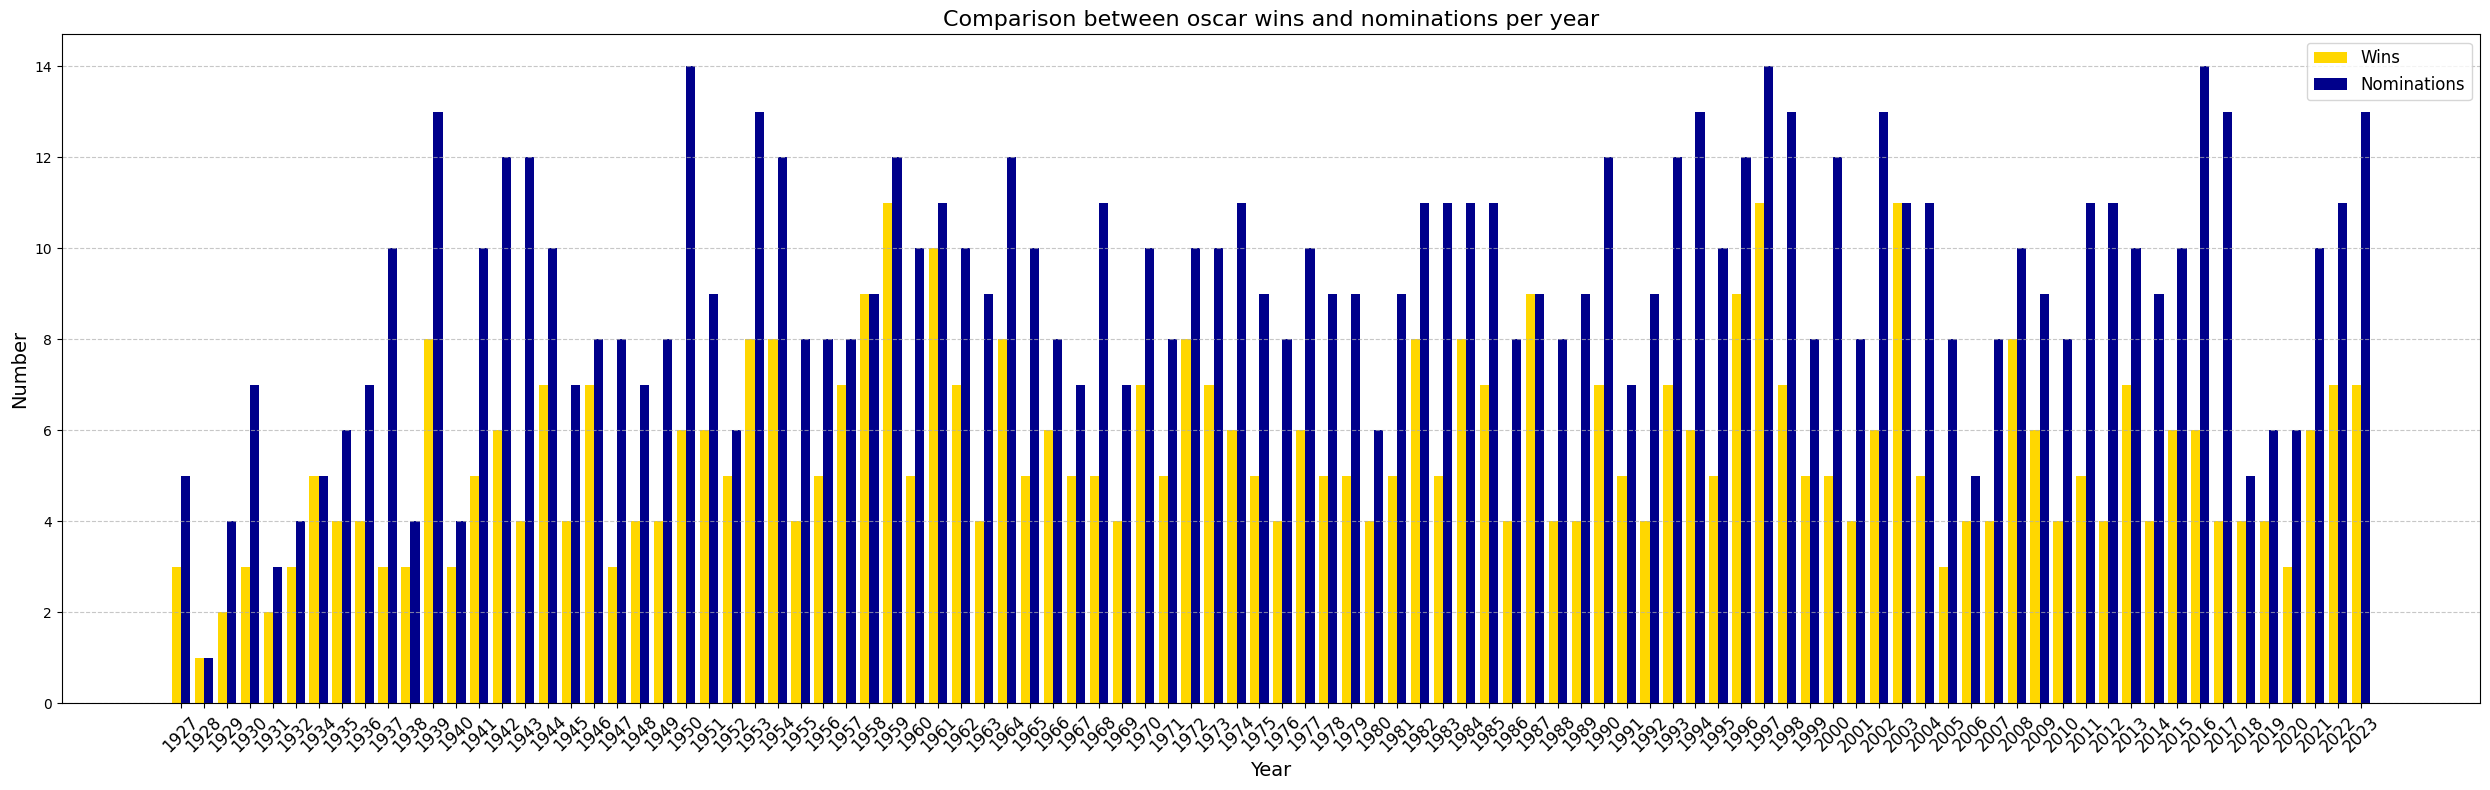

In [82]:
# Filter only oscar winners
oscar_wins = the_oscar_awards[the_oscar_awards['winner'] == True]

# Calculating oscar wins for each film per year
oscar_count = (
    oscar_wins.groupby(['year_film', 'film'])
    .size()
    .reset_index(name='oscar_count')
)

# Total number of nominations
oscar_nominations = (
    the_oscar_awards.groupby(['year_film', 'film'])
    .size()
    .reset_index(name='nomination_count')
)

# merge both datasets to compare victories and nominations
oscar_comparison = pd.merge(
    oscar_count, oscar_nominations, on=['year_film', 'film'], how='inner'
)

# movie with most Oscar wins per each year
top_oscar_films = oscar_comparison.loc[
    oscar_comparison.groupby('year_film')['oscar_count'].idxmax()
]

# Sort by year
top_oscar_films = top_oscar_films.sort_values('year_film')

# Plotting of top_oscar_films
x = top_oscar_films['year_film'].astype(str)  
bar_width = 0.4  

plt.figure(figsize=(25, 8))  

plt.bar(
    x=np.arange(len(x)) - bar_width / 2,
    height=top_oscar_films['oscar_count'],
    width=bar_width,
    color='gold',
    label='Wins',
)

plt.bar(
    x=np.arange(len(x)) + bar_width / 2,
    height=top_oscar_films['nomination_count'],
    width=bar_width,
    color='darkblue',
    label='Nominations',
)

plt.xticks(ticks=np.arange(len(x)), labels=x, rotation=45, fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.title('Comparison between oscar wins and nominations per year', fontsize=16)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

OK ANALYSIS COMPLETE, NOW WE NEED TO BE ABLE TO USE THESE FILE, SO WE SEND THEM TO A MONGODB-COMUNITY DATABASE

In [7]:
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/")
db = client["cinecritic_the_matured_tomato"]
collections = {
    "rotten_tomatoes_reviews": rotten_tomatoes_reviews,
    "releases": releases
}

for name, df in collections.items():
    db[name].drop()  # ✅ overwrite old data
    db[name].insert_many(df.to_dict(orient="records"))
    print(f"Inserted {len(df)} records into '{name}' collection ✅")


keep_collections = ["rotten_tomatoes_reviews", "releases"]

for col in db.list_collection_names():
    if col not in keep_collections:
        db[col].drop()
        print(f"Dropped '{col}' collection ❌")

print("Cleanup complete ✅")


Inserted 1129887 records into 'rotten_tomatoes_reviews' collection ✅
Inserted 1332782 records into 'releases' collection ✅
Cleanup complete ✅
